# Heart Disease Prediction Modeling
## DSCI 632 - Summer Quarter 2022
#### Due: August 21, 2022
### By: Stephan Dupoux, Allie Schneider, Francis Michael Villamater


#### Dataset Description

Our dataset includes key indicators of heart disease and reflects data from the 2020 annual CDC survey data of 400,000 adults related to their health status. According to the CDC, heart disease is one of the leading causes of death for people of most races in the United States. 47% of Americans have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. <br>

The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. A Kaggle user noticed many different factors in the dataset that directly or indirectly influence heart disease and selected the most relevant variables from it and did some cleaning so that it would be usable for machine learning projects. We are using this cleaned dataset from Kaggle.<br>

This dataset includes the following 18 attributes and 319,795 instances. 

#### Variable descriptions:<br>
* `HeartDisease` (dichotomous): Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).<br>
* `BMI` (continuous): Body Mass Index (BMI)<br>
* `Smoking` (dichotomous): Have they smoked at least 100 cigarettes in your life?<br>
* `AlcoholDrinking` (dichotomous): Yes if adult men having >14 drinks/week and adult women >7 drinks/week, no otherwise.<br>
* `Stroke` (dichotomous): Have they ever been told to have a stroke?<br>
* `PhysicalHealth` (continuous): Including physical illness and injury, for how many days during the past 30 days was their physical health not good? (0-30)<br>
* `MentalHealth` (continuous): For how many days during the past 30 days was their mental health not good? (0-30)<br>
* `DiffWalking` (dichotomous): Do they have serious difficulty walking or climbing stairs?<br>
* `Sex` (dichotomous): Male or female<br>
* `AgeCategory` (categorical, 13 levels): Age category<br>
* `Race` (categorical, 6 levels): Race/ethnicity<br>
* `Diabetic` (categorical, 4 levels): Have they ever been told to have diabetes?<br>
* `PhysicalActivity` (dichotomous): Adults who reported engaging in physical activity/exercise over the past 30 days outside of their regular job<br>
* `GenHealth` (categorical, 5 levels): How would they rate their overall health?<br>
* `SleepTime` (continuous): On average, how much sleep do they get in a 24-hour period?<br>
* `Asthma` (dichotomous): Have they ever been told to have asthma?<br>
* `KidneyDisease` (dichotomous): Excluding kidney stones, bladder infection, or incontinence, have they ever been told to have kidney disease?<br>
* `SkinCancer` (dichotomous): Have they ever been told to have skin cancer?


#### Classification Algorithms to be implemented:

* Logistic Regression – we will use a logistic regression to estimate the probability that a new instance (person) will have heart disease. If the estimated probability is greater than 50% then our model will predict that the new instance (person) does have heart disease. We will use gradient decent on the cost function to determine the optimal output. We will also review the decision boundary produced by our logistic regression model.
* Support Vector Machines – We will start off by using a linear SVM classification and move to a nonlinear SVM classification if necessary. Specifically, we will use a soft margin classification to find a good balance between keeping the street as large as possible and limiting the margin violations.
* Random Forest – We will use an ensemble of Decision Trees trained via the bagging method. We have decided to use Random Forest because this algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. The algorithm results in greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model.  



## Loading the Dataset

In [1]:
!pip install findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 51.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=7f31db7d750679c903812f8333164e9da6b135b8a13f189078ad45442e312c0a
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Heart Disease Random Forest Classifier") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

# Exporatory Data Analysis

In [4]:
heart = spark.read.csv('heart_2020_cleaned.csv',header=True, inferSchema = True)
heart.show(5)

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------+----------------+---------+---------+------+-------------+----------+
|          No| 16.6|    Yes|             No|    No|           3.0|        30.0|         No|Female|      55-59|White|     Yes|             Yes|Very good|      5.0|   Yes|           No|       Yes|
|          No|20.34|     No|             No|   Yes|           0.0|         0.0|         No|Female|80 or older|White|      No|             Yes|Very good|      7.0|    No|           No|        No|
|          No|26.58|    Y

In [5]:
for col in heart:
  print(col, ": Levels = ", heart.select([col]).distinct())
  heart.select([col]).distinct().show()
  print()

Column<'HeartDisease'> : Levels =  DataFrame[HeartDisease: string]
+------------+
|HeartDisease|
+------------+
|          No|
|         Yes|
+------------+


Column<'BMI'> : Levels =  DataFrame[BMI: double]
+-----+
|  BMI|
+-----+
|17.56|
|17.95|
|23.04|
| 26.7|
|26.72|
|43.03|
|45.43|
|30.49|
|75.29|
|38.61|
| 14.9|
|65.78|
|58.92|
|41.42|
|35.17|
|60.98|
|40.11|
| 64.2|
| 49.8|
|73.73|
+-----+
only showing top 20 rows


Column<'Smoking'> : Levels =  DataFrame[Smoking: string]
+-------+
|Smoking|
+-------+
|     No|
|    Yes|
+-------+


Column<'AlcoholDrinking'> : Levels =  DataFrame[AlcoholDrinking: string]
+---------------+
|AlcoholDrinking|
+---------------+
|             No|
|            Yes|
+---------------+


Column<'Stroke'> : Levels =  DataFrame[Stroke: string]
+------+
|Stroke|
+------+
|    No|
|   Yes|
+------+


Column<'PhysicalHealth'> : Levels =  DataFrame[PhysicalHealth: double]
+--------------+
|PhysicalHealth|
+--------------+
|           8.0|
|           0.0|
|   

In [6]:
# Creating dataframes for categorical and continuous variables
catg = heart.select(['HeartDisease','Smoking','AlcoholDrinking','Stroke',
             'DiffWalking','Sex','AgeCategory','Race','Diabetic',
             'PhysicalActivity','GenHealth','Asthma','KidneyDisease',
             'SkinCancer'])
catg.show()

cont = heart.select(['BMI','PhysicalHealth','MentalHealth','SleepTime'])
cont.show()

+------------+-------+---------------+------+-----------+------+-----------+-----+--------------------+----------------+---------+------+-------------+----------+
|HeartDisease|Smoking|AlcoholDrinking|Stroke|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|Asthma|KidneyDisease|SkinCancer|
+------------+-------+---------------+------+-----------+------+-----------+-----+--------------------+----------------+---------+------+-------------+----------+
|          No|    Yes|             No|    No|         No|Female|      55-59|White|                 Yes|             Yes|Very good|   Yes|           No|       Yes|
|          No|     No|             No|   Yes|         No|Female|80 or older|White|                  No|             Yes|Very good|    No|           No|        No|
|          No|    Yes|             No|    No|         No|  Male|      65-69|White|                 Yes|             Yes|     Fair|   Yes|           No|        No|
|          No|     No|

#### Visualizations of Categorical Variables by Presentation of Heart Disease

In [7]:
import pandas as pd
import numpy as np

heart_pd = pd.read_csv("heart_2020_cleaned.csv")
heart_pd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
catgnames = ['HeartDisease','Smoking','AlcoholDrinking','Stroke',
             'DiffWalking','Sex','AgeCategory','Race','Diabetic',
             'PhysicalActivity','GenHealth','Asthma','KidneyDisease',
             'SkinCancer']
contnames = ['BMI','PhysicalHealth','MentalHealth','SleepTime']

In [9]:
catg_pd = heart_pd.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'], axis = 1)
catg_pd.head()
cont_pd = heart_pd[contnames]
cont_pd.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(col, dataset, hd: bool = False):
    plt.figure(figsize = (20,5))
    sns.set_theme(style="whitegrid")
    if hd == True:
        sns.countplot(x= dataset[col], hue = 'HeartDisease', data = dataset, palette = 'Accent')
    else:
        sns.countplot(x= dataset[col], data = dataset, palette = 'Accent')
    plt.show()
    plt.clf()
    
def distcurve(col, dataset, hd: bool = False):
    plt.figure(figsize = (20,5))
    sns.set_theme(style="whitegrid")
    if hd == True:
        sns.histplot(data=dataset, x = col, hue = dataset['HeartDisease'], kde = True, palette = 'CMRmap_r')
    else:
        sns.histplot(data=dataset, x = col, kde = True, palette = 'CMRmap_r')
    plt.ylabel("Count")
    plt.show()
    plt.clf()
    
def boxplot(col, dataset, hd: bool = False):
    plt.figure(figsize = (20,5))
    sns.set_theme(style="whitegrid")
    if hd == True:
        sns.boxplot(x = dataset[col], y = dataset['HeartDisease'], palette = 'CMRmap_r')
    else:
        sns.boxplot(x = dataset[col], palette = 'CMRmap_r')
    plt.show()
    plt.clf()

Variable: HeartDisease


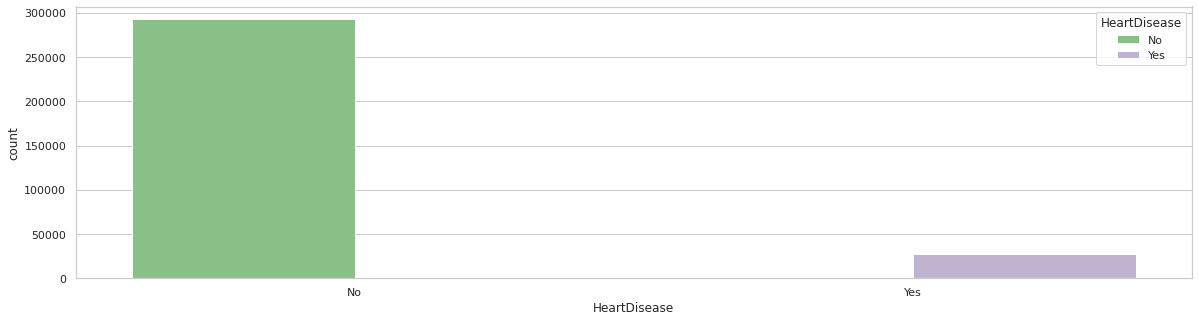

HeartDisease      No    Yes   Total
HeartDisease                       
No            292422      0  292422
Yes                0  27373   27373
Total         292422  27373  319795
HeartDisease   No  Yes     Total
HeartDisease                    
No            1.0  0.0  0.914405
Yes           0.0  1.0  0.085595


Variable: Smoking


<Figure size 432x288 with 0 Axes>

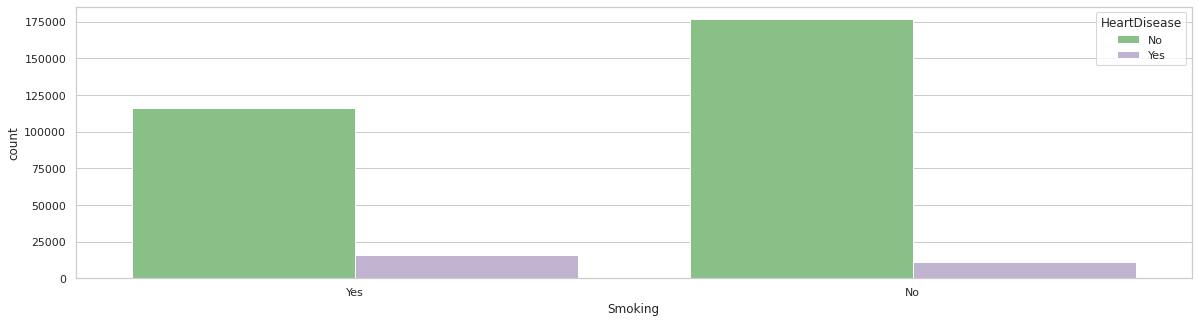

HeartDisease      No    Yes   Total
Smoking                            
No            176551  11336  187887
Yes           115871  16037  131908
Total         292422  27373  319795
HeartDisease        No       Yes     Total
Smoking                                   
No            0.603754  0.414131  0.587523
Yes           0.396246  0.585869  0.412477


Variable: AlcoholDrinking


<Figure size 432x288 with 0 Axes>

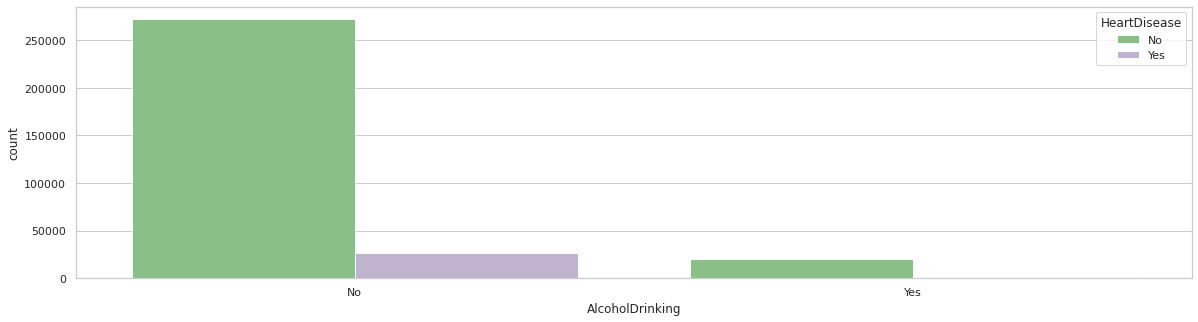

HeartDisease         No    Yes   Total
AlcoholDrinking                       
No               271786  26232  298018
Yes               20636   1141   21777
Total            292422  27373  319795
HeartDisease           No       Yes     Total
AlcoholDrinking                              
No               0.929431  0.958317  0.931903
Yes              0.070569  0.041683  0.068097


Variable: Stroke


<Figure size 432x288 with 0 Axes>

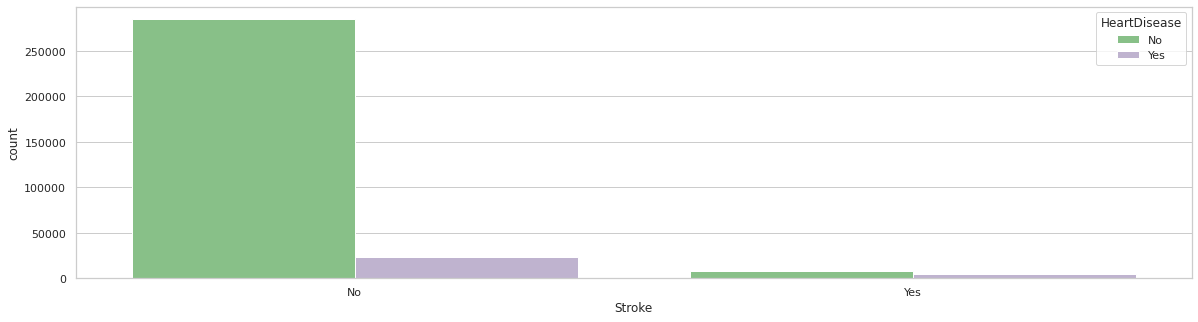

HeartDisease      No    Yes   Total
Stroke                             
No            284742  22984  307726
Yes             7680   4389   12069
Total         292422  27373  319795
HeartDisease        No      Yes    Total
Stroke                                  
No            0.973737  0.83966  0.96226
Yes           0.026263  0.16034  0.03774


Variable: DiffWalking


<Figure size 432x288 with 0 Axes>

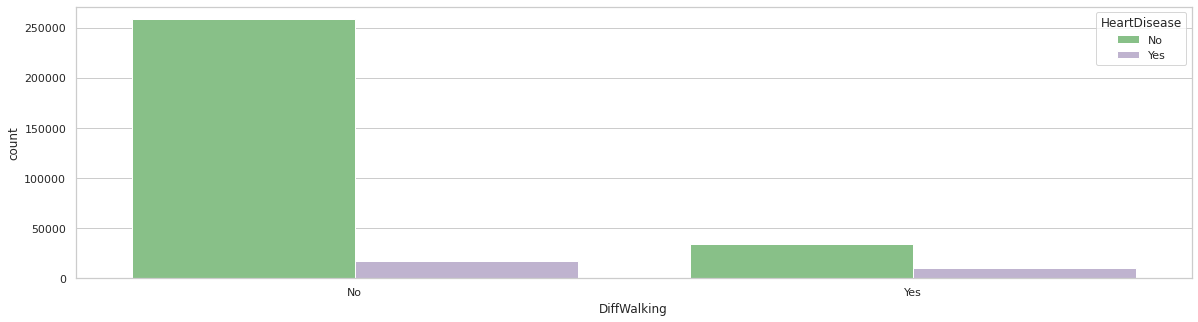

HeartDisease      No    Yes   Total
DiffWalking                        
No            258040  17345  275385
Yes            34382  10028   44410
Total         292422  27373  319795
HeartDisease        No       Yes    Total
DiffWalking                              
No            0.882423  0.633654  0.86113
Yes           0.117577  0.366346  0.13887


Variable: Sex


<Figure size 432x288 with 0 Axes>

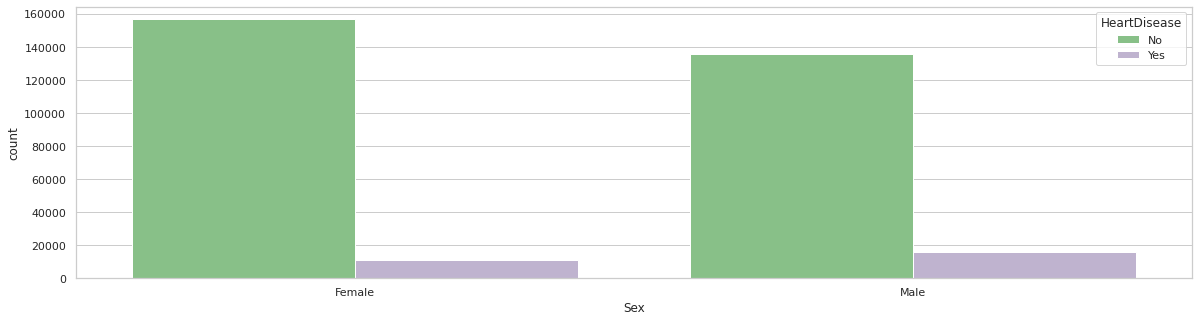

HeartDisease      No    Yes   Total
Sex                                
Female        156571  11234  167805
Male          135851  16139  151990
Total         292422  27373  319795
HeartDisease        No       Yes     Total
Sex                                       
Female        0.535428  0.410404  0.524727
Male          0.464572  0.589596  0.475273


Variable: AgeCategory


<Figure size 432x288 with 0 Axes>

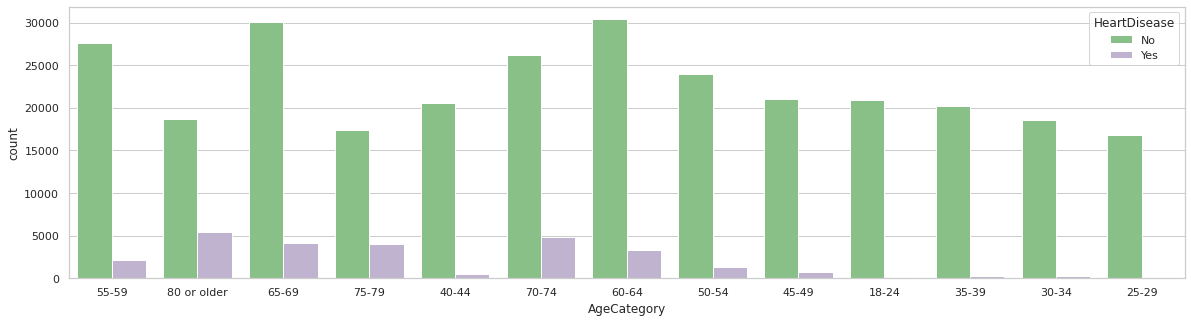

HeartDisease      No    Yes   Total
AgeCategory                        
18-24          20934    130   21064
25-29          16822    133   16955
30-34          18527    226   18753
35-39          20254    296   20550
40-44          20520    486   21006
45-49          21047    744   21791
50-54          23999   1383   25382
55-59          27555   2202   29757
60-64          30359   3327   33686
65-69          30050   4101   34151
70-74          26218   4847   31065
75-79          17433   4049   21482
80 or older    18704   5449   24153
Total         292422  27373  319795
HeartDisease        No       Yes     Total
AgeCategory                               
18-24         0.071588  0.004749  0.065867
25-29         0.057526  0.004859  0.053018
30-34         0.063357  0.008256  0.058641
35-39         0.069263  0.010814  0.064260
40-44         0.070173  0.017755  0.065686
45-49         0.071975  0.027180  0.068141
50-54         0.082070  0.050524  0.079370
55-59         0.094230  0.080444  0.0

<Figure size 432x288 with 0 Axes>

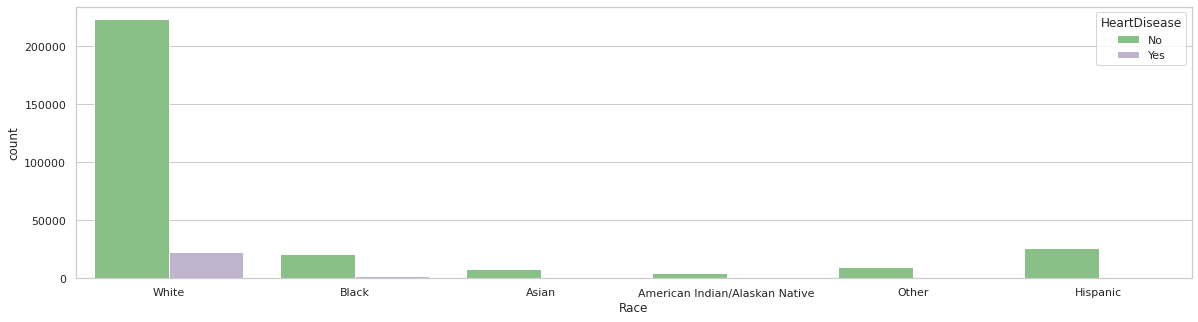

HeartDisease                        No    Yes   Total
Race                                                 
American Indian/Alaskan Native    4660    542    5202
Asian                             7802    266    8068
Black                            21210   1729   22939
Hispanic                         26003   1443   27446
Other                            10042    886   10928
White                           222705  22507  245212
Total                           292422  27373  319795
HeartDisease                          No       Yes     Total
Race                                                        
American Indian/Alaskan Native  0.015936  0.019801  0.016267
Asian                           0.026681  0.009718  0.025229
Black                           0.072532  0.063164  0.071730
Hispanic                        0.088923  0.052716  0.085824
Other                           0.034341  0.032368  0.034172
White                           0.761588  0.822234  0.766779


Variable: Diabetic


<Figure size 432x288 with 0 Axes>

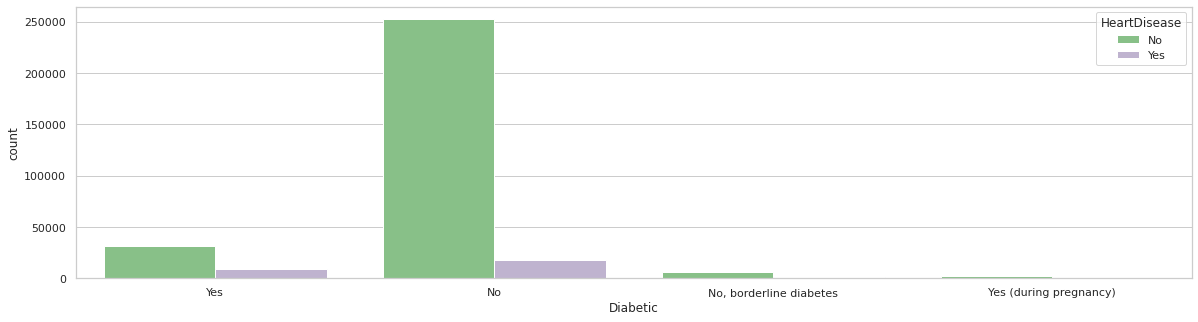

HeartDisease                 No    Yes   Total
Diabetic                                      
No                       252134  17519  269653
No, borderline diabetes    5992    789    6781
Yes                       31845   8957   40802
Yes (during pregnancy)     2451    108    2559
Total                    292422  27373  319795
HeartDisease                   No       Yes     Total
Diabetic                                             
No                       0.862227  0.640010  0.843206
No, borderline diabetes  0.020491  0.028824  0.021204
Yes                      0.108901  0.327220  0.127588
Yes (during pregnancy)   0.008382  0.003945  0.008002


Variable: PhysicalActivity


<Figure size 432x288 with 0 Axes>

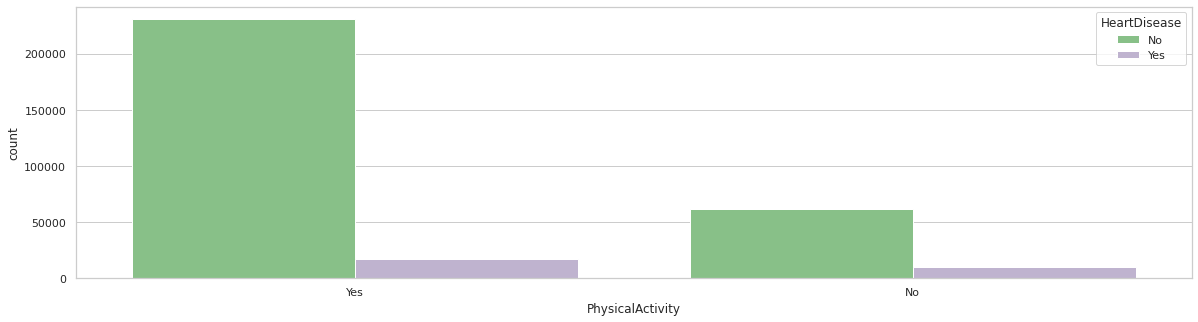

HeartDisease          No    Yes   Total
PhysicalActivity                       
No                 61954   9884   71838
Yes               230468  17489  247957
Total             292422  27373  319795
HeartDisease            No       Yes     Total
PhysicalActivity                              
No                0.211865  0.361086  0.224638
Yes               0.788135  0.638914  0.775362


Variable: GenHealth


<Figure size 432x288 with 0 Axes>

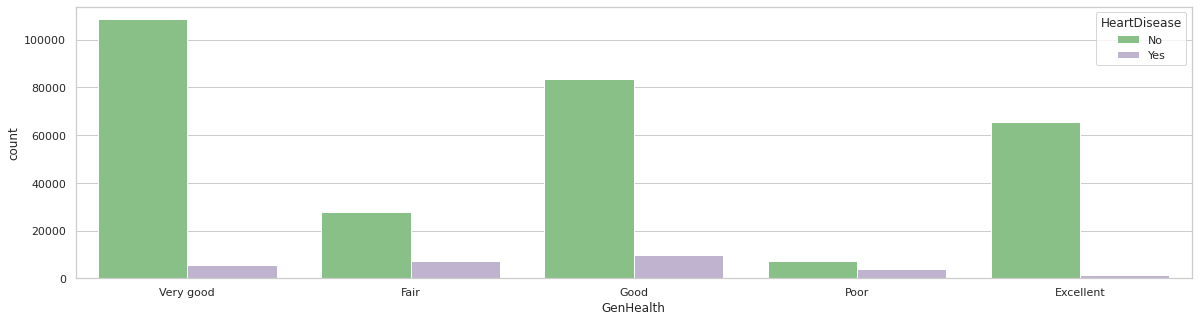

HeartDisease      No    Yes   Total
GenHealth                          
Excellent      65342   1500   66842
Fair           27593   7084   34677
Good           83571   9558   93129
Poor            7439   3850   11289
Very good     108477   5381  113858
Total         292422  27373  319795
HeartDisease        No       Yes     Total
GenHealth                                 
Excellent     0.223451  0.054799  0.209015
Fair          0.094360  0.258795  0.108435
Good          0.285789  0.349176  0.291215
Poor          0.025439  0.140650  0.035301
Very good     0.370960  0.196581  0.356034


Variable: Asthma


<Figure size 432x288 with 0 Axes>

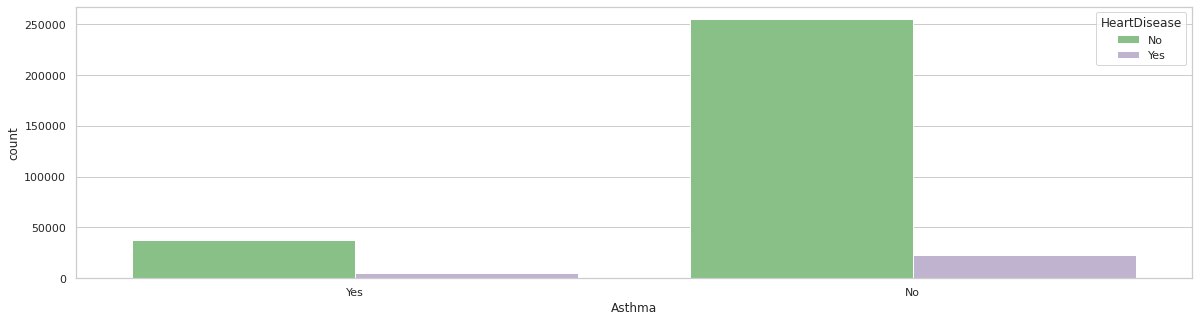

HeartDisease      No    Yes   Total
Asthma                             
No            254483  22440  276923
Yes            37939   4933   42872
Total         292422  27373  319795
HeartDisease        No       Yes     Total
Asthma                                    
No            0.870259  0.819786  0.865939
Yes           0.129741  0.180214  0.134061


Variable: KidneyDisease


<Figure size 432x288 with 0 Axes>

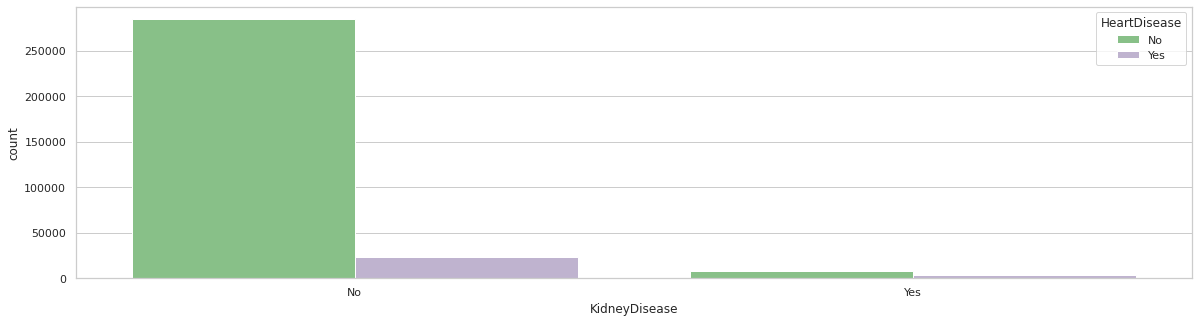

HeartDisease       No    Yes   Total
KidneyDisease                       
No             284098  23918  308016
Yes              8324   3455   11779
Total          292422  27373  319795
HeartDisease         No       Yes     Total
KidneyDisease                              
No             0.971534  0.873781  0.963167
Yes            0.028466  0.126219  0.036833


Variable: SkinCancer


<Figure size 432x288 with 0 Axes>

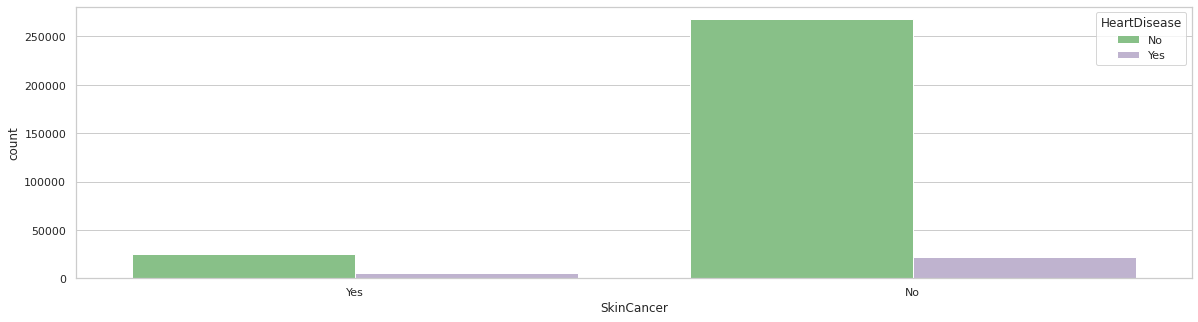

HeartDisease      No    Yes   Total
SkinCancer                         
No            267583  22393  289976
Yes            24839   4980   29819
Total         292422  27373  319795
HeartDisease        No       Yes     Total
SkinCancer                                
No            0.915058  0.818069  0.906756
Yes           0.084942  0.181931  0.093244




<Figure size 432x288 with 0 Axes>

In [11]:
for i in catg_pd:
    print('Variable: {}'.format(i))
    barplot(i, catg_pd, hd = True)
    print(pd.crosstab(getattr(heart_pd, i), heart_pd.HeartDisease, margins = True, margins_name = "Total"))
    print(pd.crosstab(getattr(heart_pd, i), heart_pd.HeartDisease, normalize = 'columns', margins = True, margins_name = "Total"))
    print('\n')

From these graphs, we can make the following observations:

A large portion of this dataset is negative for Heart Disease (292422 negative, 27373 positive.)
Most respondents are aged 65-69, then 60-64, with 70-74 as the third most populous age bracket.
An overwhelming majority of respondents were white.

Continuous Variables - Descriptive Statistics and Visualizations

In [12]:
cont.summary().show()

+-------+------------------+------------------+-----------------+------------------+
|summary|               BMI|    PhysicalHealth|     MentalHealth|         SleepTime|
+-------+------------------+------------------+-----------------+------------------+
|  count|            319795|            319795|           319795|            319795|
|   mean|28.325398520925706|3.3717100017198516|3.898366140808956| 7.097074688472302|
| stddev| 6.356100200470763| 7.950850182571355|7.955235218943604|1.4360070609642803|
|    min|             12.02|               0.0|              0.0|               1.0|
|    25%|             24.03|               0.0|              0.0|               6.0|
|    50%|             27.34|               0.0|              0.0|               7.0|
|    75%|             31.42|               2.0|              3.0|               8.0|
|    max|             94.85|              30.0|             30.0|              24.0|
+-------+------------------+------------------+-----------------+

Variable: BMI


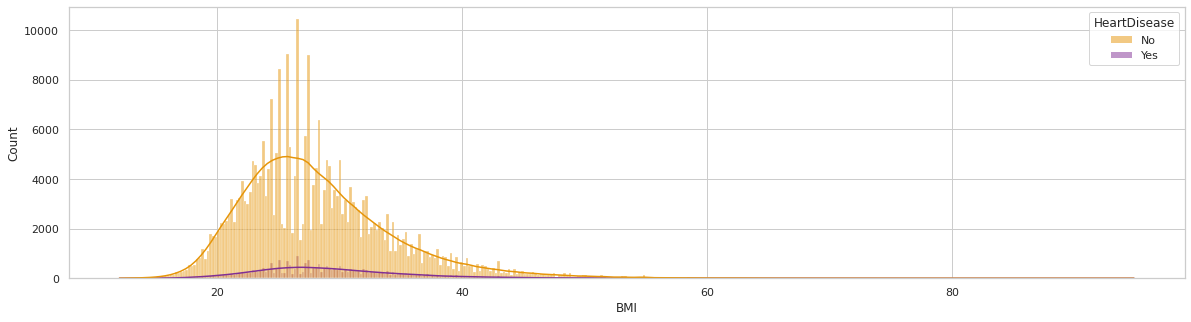

<Figure size 432x288 with 0 Axes>

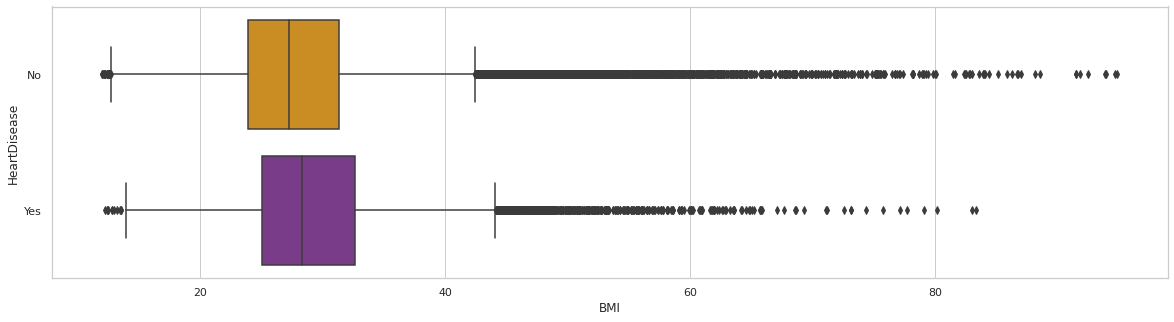

Variable: PhysicalHealth


<Figure size 432x288 with 0 Axes>

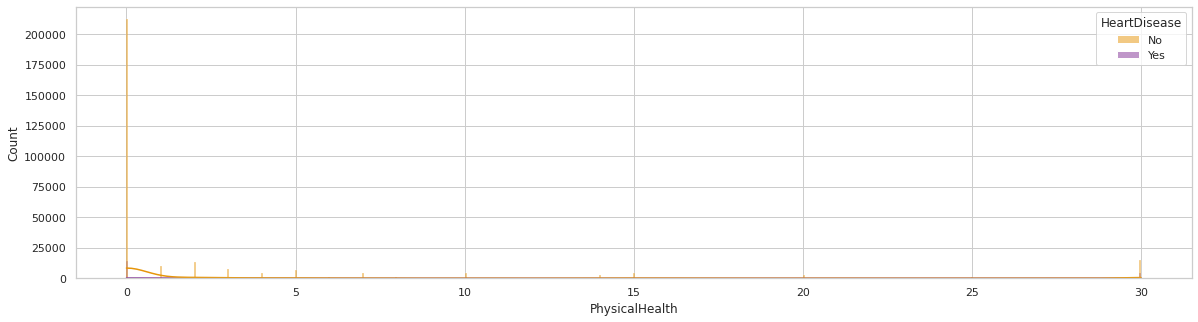

<Figure size 432x288 with 0 Axes>

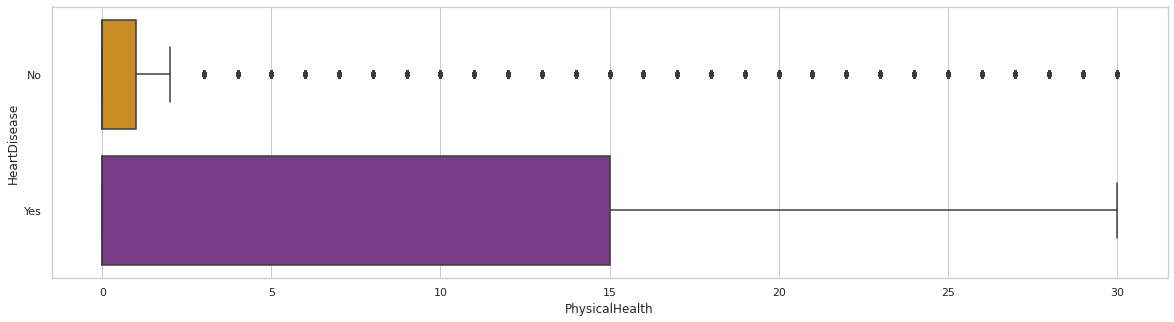

Variable: MentalHealth


<Figure size 432x288 with 0 Axes>

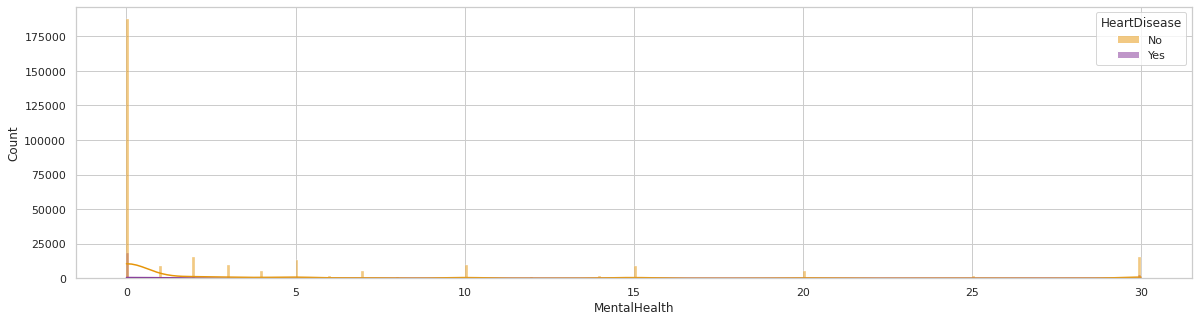

<Figure size 432x288 with 0 Axes>

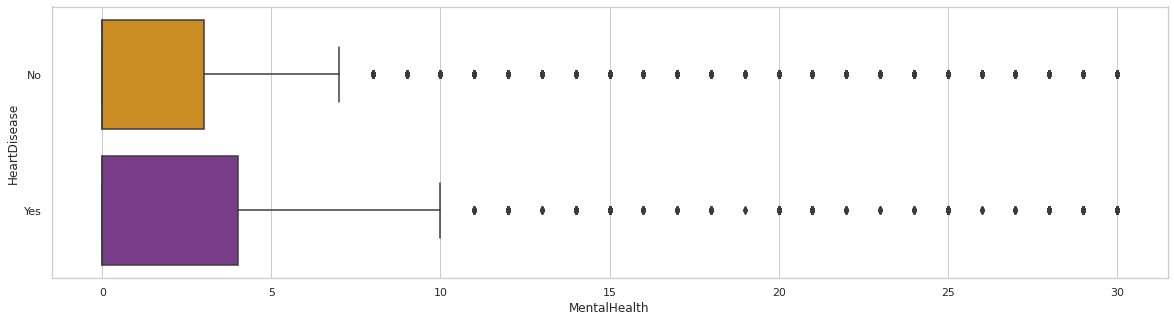

Variable: SleepTime


<Figure size 432x288 with 0 Axes>

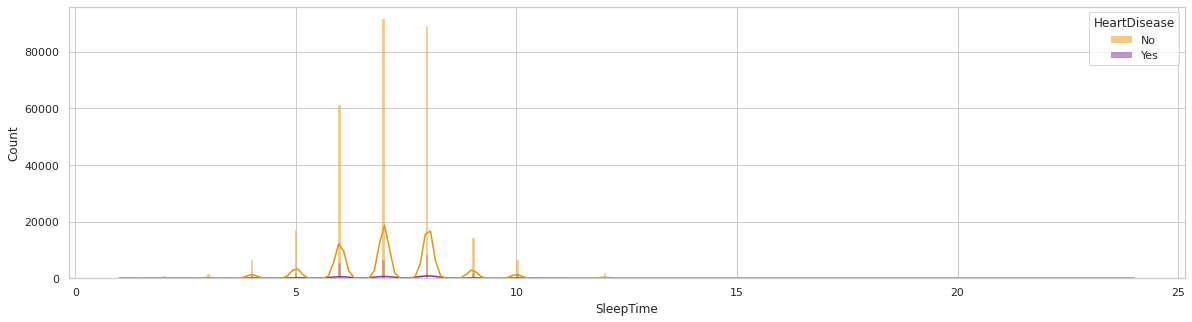

<Figure size 432x288 with 0 Axes>

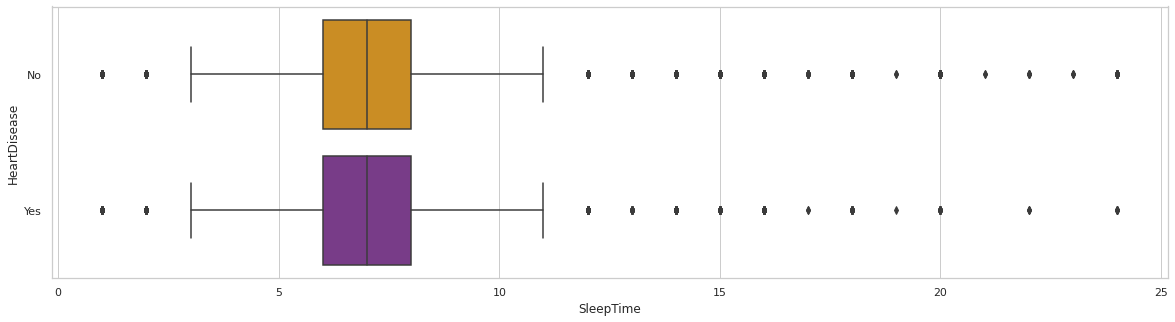

<Figure size 432x288 with 0 Axes>

In [13]:
#Continuous Variables in Whole Dataset by HD presentation
for i in cont_pd:
    print('Variable: {}'.format(i))
    distcurve(i, heart_pd, hd = True)
    boxplot(i, heart_pd, hd = True)

From the above visualizations we can observe:

BMI is overall slightly higher in the Heart Disease Positive Population. The curve itself is right skewed, but should be relatively normal once outliers have been properly handled.
PhysicalHealth in the Heart Disease Negative Population has an extreme right skew, with most responses being 2 or less, and anything above 2 considered an outlier. In the Heart Disease Positive Population, range is from 0 to 30 with no responses considered to be outliers. This distribution is also right skewed, but not as heavily as the Heart Disease Negative group.
MentalHealth distibution is larely the same for both groups, with a slightly greater range in the Heart Disease Positive Population (0-7 negative, 0-10 positive).
SleepTime boxplots for both groups are practically identical.

### Heart Disease Positive Population EDA

In [14]:
hdpos = heart.filter(heart["HeartDisease"] == 'Yes')
hdpos.show()

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------+----------------+---------+---------+------+-------------+----------+
|         Yes|28.87|    Yes|             No|    No|           6.0|         0.0|        Yes|Female|      75-79|Black|      No|              No|     Fair|     12.0|    No|           No|        No|
|         Yes| 34.3|    Yes|             No|    No|          30.0|         0.0|        Yes|  Male|      60-64|White|     Yes|              No|     Poor|     15.0|   Yes|           No|        No|
|         Yes|32.98|    Y

#### HD Positive Categorical Variables Barplots and CrossTabs

In [15]:
hdpos_pd = heart_pd[heart_pd["HeartDisease"] == 'Yes']
hdpos_pd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


Variable: HeartDisease


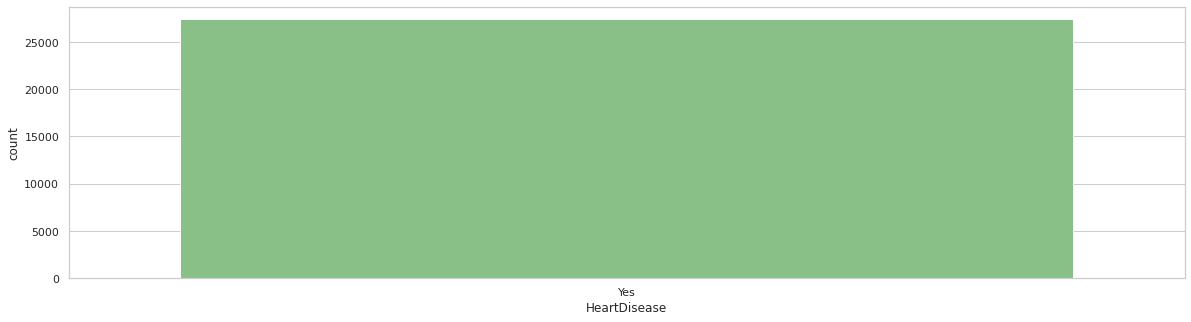

Yes    27373
Name: HeartDisease, dtype: int64
Yes    100.0
Name: HeartDisease, dtype: float64


Variable: Smoking


<Figure size 432x288 with 0 Axes>

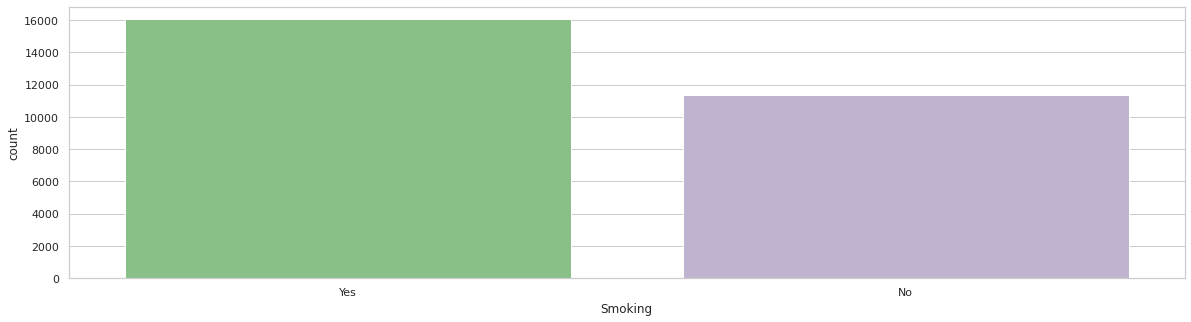

Yes    16037
No     11336
Name: Smoking, dtype: int64
Yes    58.59
No     41.41
Name: Smoking, dtype: float64


Variable: AlcoholDrinking


<Figure size 432x288 with 0 Axes>

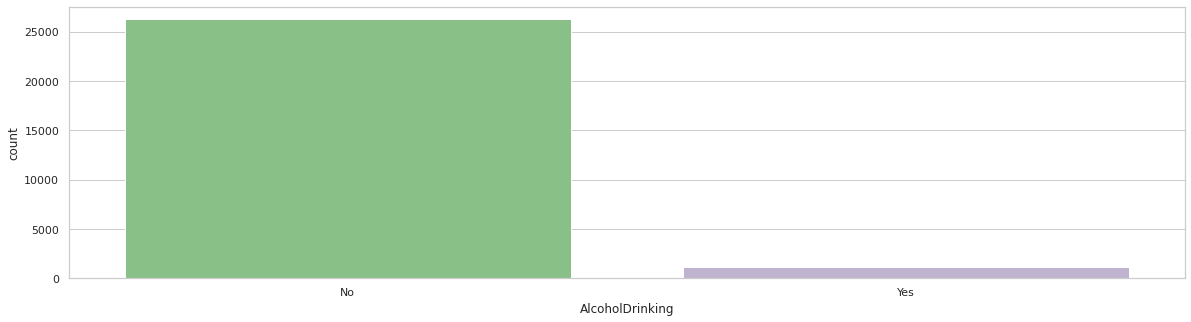

No     26232
Yes     1141
Name: AlcoholDrinking, dtype: int64
No     95.83
Yes     4.17
Name: AlcoholDrinking, dtype: float64


Variable: Stroke


<Figure size 432x288 with 0 Axes>

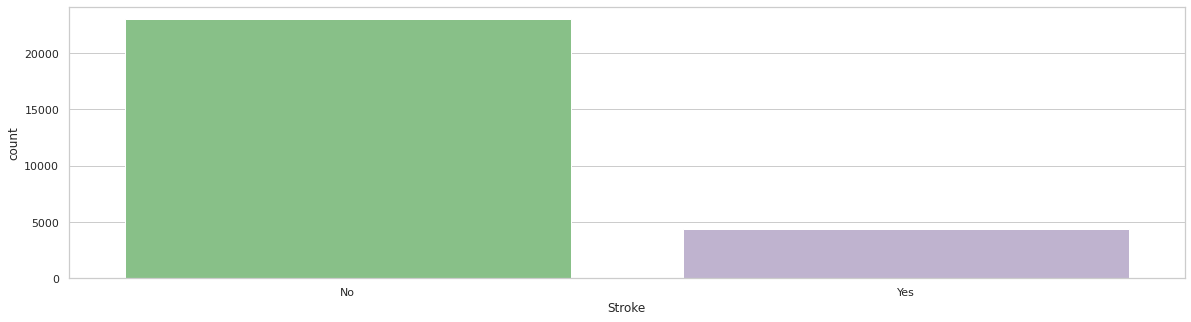

No     22984
Yes     4389
Name: Stroke, dtype: int64
No     83.97
Yes    16.03
Name: Stroke, dtype: float64


Variable: DiffWalking


<Figure size 432x288 with 0 Axes>

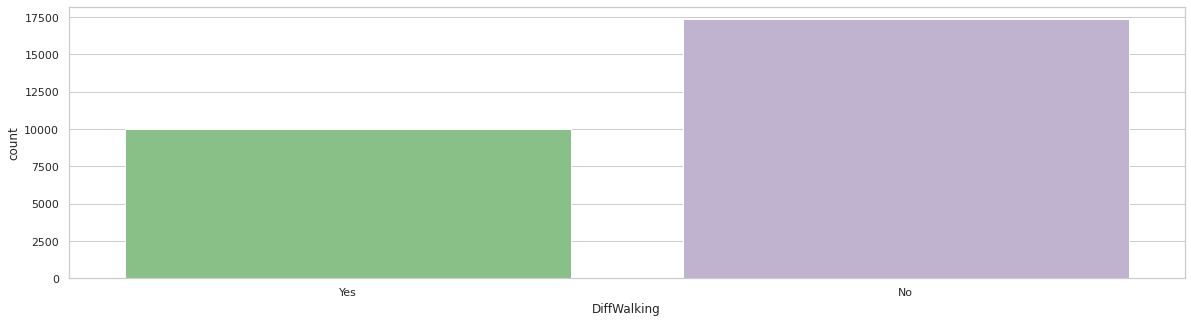

No     17345
Yes    10028
Name: DiffWalking, dtype: int64
No     63.37
Yes    36.63
Name: DiffWalking, dtype: float64


Variable: Sex


<Figure size 432x288 with 0 Axes>

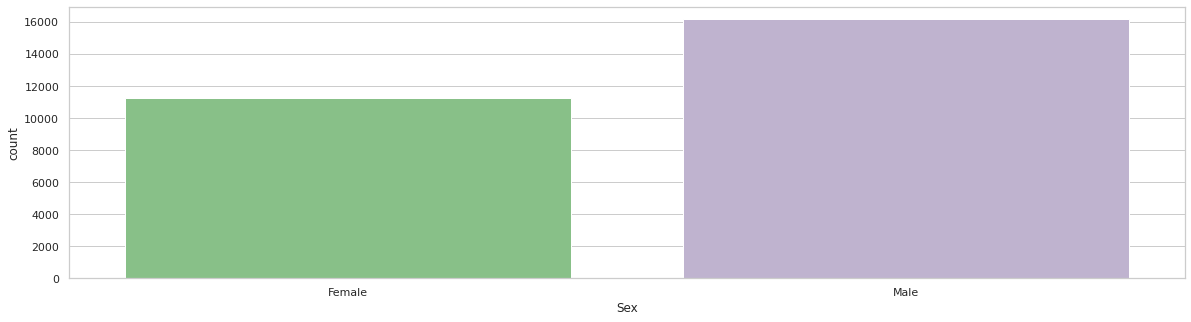

Male      16139
Female    11234
Name: Sex, dtype: int64
Male      58.96
Female    41.04
Name: Sex, dtype: float64


Variable: AgeCategory


<Figure size 432x288 with 0 Axes>

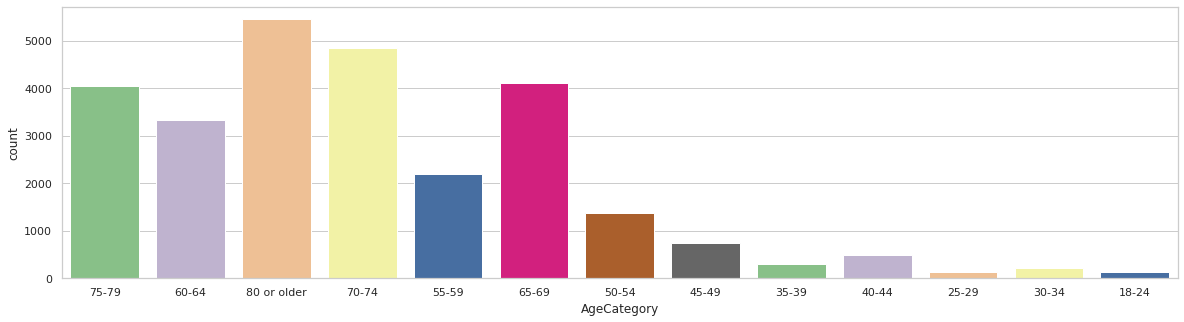

80 or older    5449
70-74          4847
65-69          4101
75-79          4049
60-64          3327
55-59          2202
50-54          1383
45-49           744
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: AgeCategory, dtype: int64
80 or older    19.91
70-74          17.71
65-69          14.98
75-79          14.79
60-64          12.15
55-59           8.04
50-54           5.05
45-49           2.72
40-44           1.78
35-39           1.08
30-34           0.83
25-29           0.49
18-24           0.47
Name: AgeCategory, dtype: float64


Variable: Race


<Figure size 432x288 with 0 Axes>

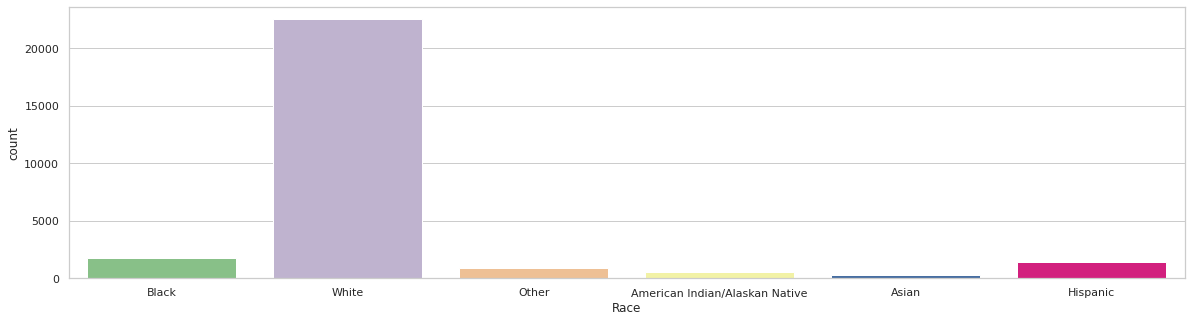

White                             22507
Black                              1729
Hispanic                           1443
Other                               886
American Indian/Alaskan Native      542
Asian                               266
Name: Race, dtype: int64
White                             82.22
Black                              6.32
Hispanic                           5.27
Other                              3.24
American Indian/Alaskan Native     1.98
Asian                              0.97
Name: Race, dtype: float64


Variable: Diabetic


<Figure size 432x288 with 0 Axes>

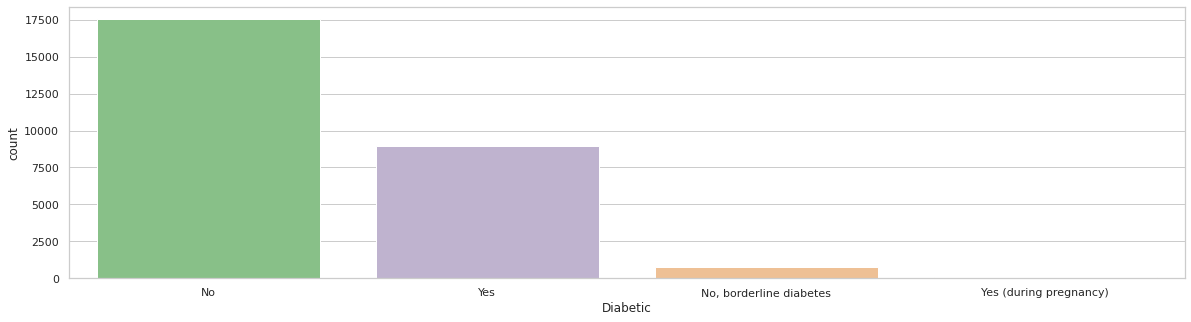

No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
Name: Diabetic, dtype: int64
No                         64.00
Yes                        32.72
No, borderline diabetes     2.88
Yes (during pregnancy)      0.39
Name: Diabetic, dtype: float64


Variable: PhysicalActivity


<Figure size 432x288 with 0 Axes>

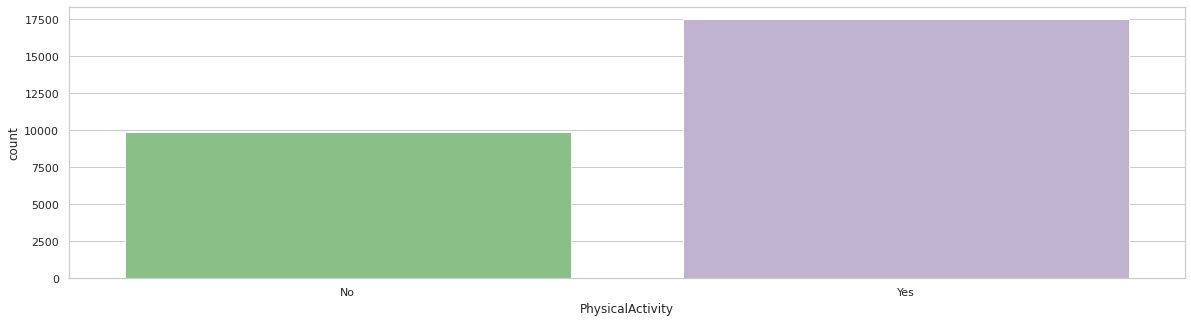

Yes    17489
No      9884
Name: PhysicalActivity, dtype: int64
Yes    63.89
No     36.11
Name: PhysicalActivity, dtype: float64


Variable: GenHealth


<Figure size 432x288 with 0 Axes>

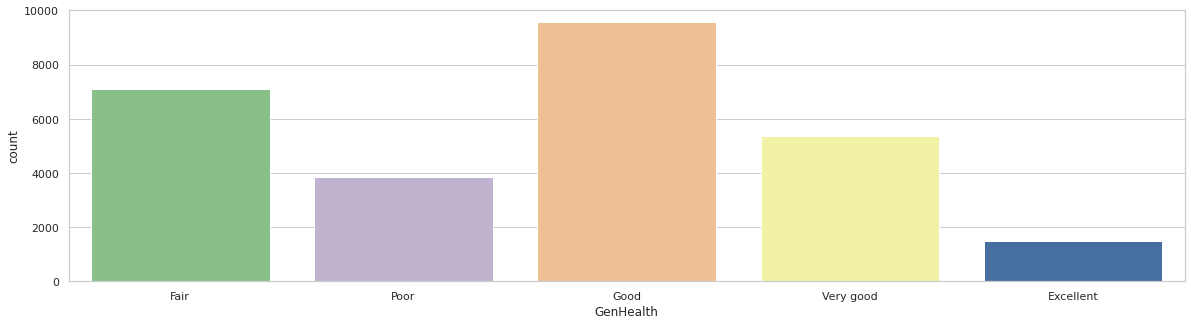

Good         9558
Fair         7084
Very good    5381
Poor         3850
Excellent    1500
Name: GenHealth, dtype: int64
Good         34.92
Fair         25.88
Very good    19.66
Poor         14.06
Excellent     5.48
Name: GenHealth, dtype: float64


Variable: Asthma


<Figure size 432x288 with 0 Axes>

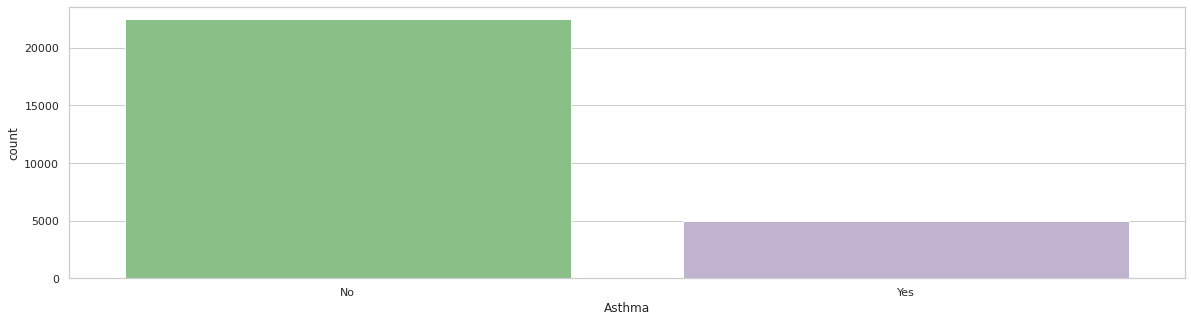

No     22440
Yes     4933
Name: Asthma, dtype: int64
No     81.98
Yes    18.02
Name: Asthma, dtype: float64


Variable: KidneyDisease


<Figure size 432x288 with 0 Axes>

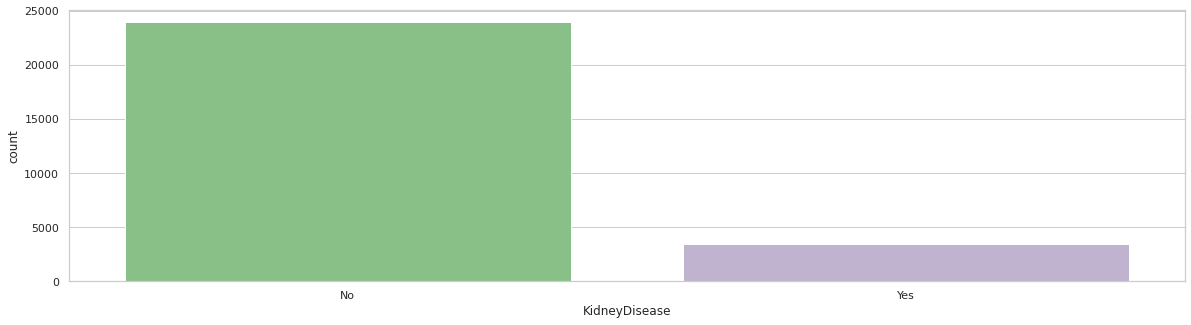

No     23918
Yes     3455
Name: KidneyDisease, dtype: int64
No     87.38
Yes    12.62
Name: KidneyDisease, dtype: float64


Variable: SkinCancer


<Figure size 432x288 with 0 Axes>

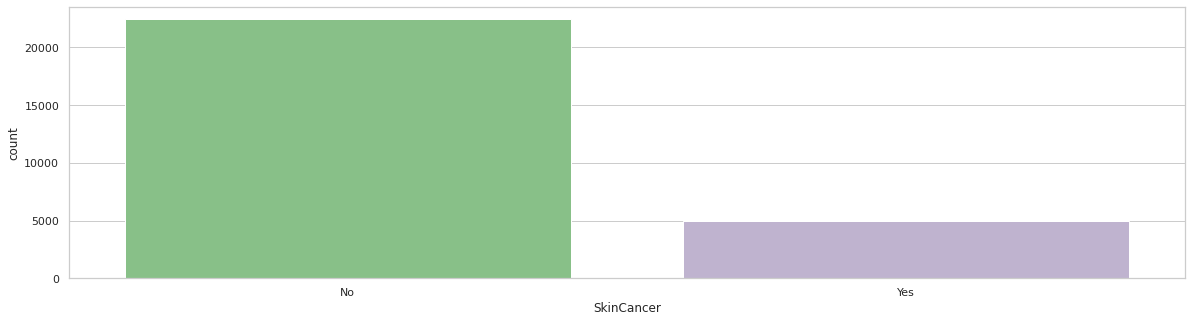

No     22393
Yes     4980
Name: SkinCancer, dtype: int64
No     81.81
Yes    18.19
Name: SkinCancer, dtype: float64




<Figure size 432x288 with 0 Axes>

In [16]:
#Categorical Variables in HDPositive Population
for i in catgnames:
    print('Variable: {}'.format(i))
    barplot(i, hdpos_pd, hd = False)
    print(hdpos_pd[i].value_counts())
    print((hdpos_pd[i].value_counts(normalize = True)*100).round(2))
    print('\n')

From the above visualizations, we can observe:
* 58% of the HD Positive Population are Smokers
* A very small portion of people with Heart Disease have excessive alcohol consumption.
* Less than 25% of the HD positive population have had a stroke.
* Just over a third of the HD positive population have difficulty walking.
* Majority of the HD positive population are male.
* The top 3 age brackets for HD positive individuals are: 80 or older, 70-74, and 65-69.
* An overwhelming amount of individuals who are HD positive, are white. This is likely because the entire survey population is mostly white, and I'd expect the same result in the HD negative population. 
* Most of the HD positive population (64%) does not have diabetes.
* About 2/3's (63.89%) of the HD positive population report being physically active outside their jobs within the last 30 days.
* Most respondents who were HD positive would've rated their general health as "good".
* Less than 20% of the HD positive population has asthma, skin cancer, or kidney disease.

#### HD Positive Continuous Variables - Descriptive Statistics and Visualizations

In [17]:
hdpos.select(['BMI','PhysicalHealth','MentalHealth','SleepTime']).summary().show()

+-------+------------------+------------------+----------------+------------------+
|summary|               BMI|    PhysicalHealth|    MentalHealth|         SleepTime|
+-------+------------------+------------------+----------------+------------------+
|  count|             27373|             27373|           27373|             27373|
|   mean|29.401592079787008|   7.8082416980236|4.64176378182881| 7.136156066196617|
| stddev| 6.577150790202946|11.487819033297152| 9.1719315894986|1.7808628636528967|
|    min|             12.21|               0.0|             0.0|               1.0|
|    25%|             25.06|               0.0|             0.0|               6.0|
|    50%|             28.34|               0.0|             0.0|               7.0|
|    75%|             32.69|              15.0|             3.0|               8.0|
|    max|             83.33|              30.0|            30.0|              24.0|
+-------+------------------+------------------+----------------+------------

In [18]:
# Creating dataframes for categorical and continuous variables
catg_pd = heart_pd.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'], axis = 1)
catg_pd.head()
cont_pd = heart_pd[contnames]
cont_pd.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


### Heart Disease Negative Population EDA

In [19]:
hdneg = heart.filter(heart["HeartDisease"] == 'No')
hdneg.show()

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+
|          No| 16.6|    Yes|             No|    No|           3.0|        30.0|         No|Female|      55-59|White|                 Yes|             Yes|Very good|      5.0|   Yes|           No|       Yes|
|          No|20.34|     No|             No|   Yes|           0.0|         0.0|         No|Female|80 or older|White|                  No|             Yes|Very good|      7.

In [20]:
hdneg_pd = heart_pd[heart_pd["HeartDisease"] == 'No']
hdneg_pd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### HD Negative Categorical Variables - Barplots and CrossTabs

Variable: HeartDisease


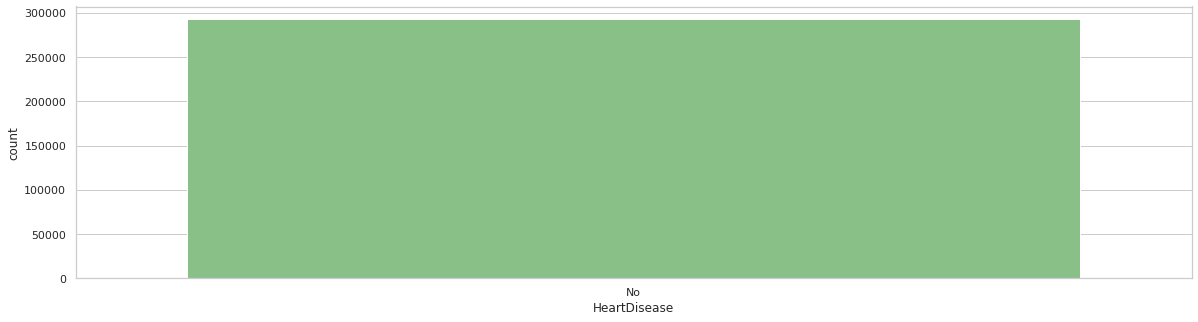

No    292422
Name: HeartDisease, dtype: int64
No    100.0
Name: HeartDisease, dtype: float64


Variable: Smoking


<Figure size 432x288 with 0 Axes>

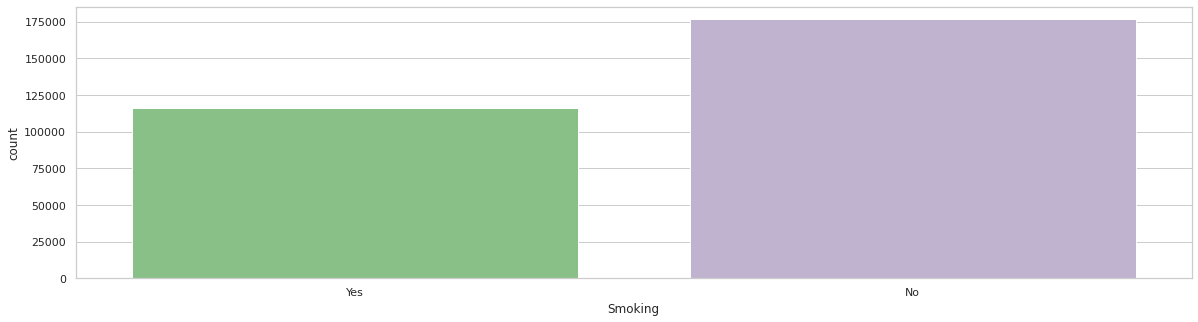

No     176551
Yes    115871
Name: Smoking, dtype: int64
No     60.38
Yes    39.62
Name: Smoking, dtype: float64


Variable: AlcoholDrinking


<Figure size 432x288 with 0 Axes>

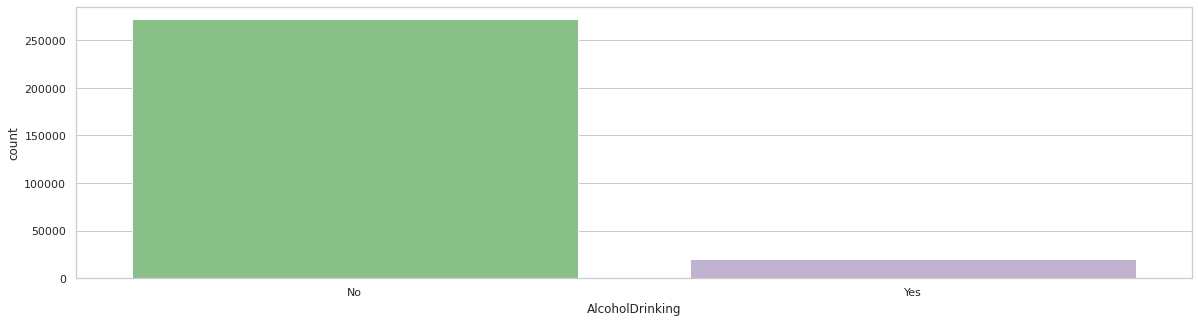

No     271786
Yes     20636
Name: AlcoholDrinking, dtype: int64
No     92.94
Yes     7.06
Name: AlcoholDrinking, dtype: float64


Variable: Stroke


<Figure size 432x288 with 0 Axes>

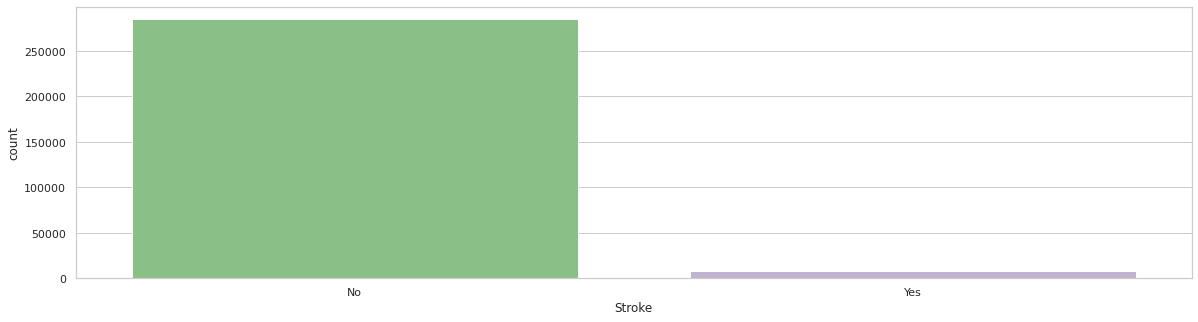

No     284742
Yes      7680
Name: Stroke, dtype: int64
No     97.37
Yes     2.63
Name: Stroke, dtype: float64


Variable: DiffWalking


<Figure size 432x288 with 0 Axes>

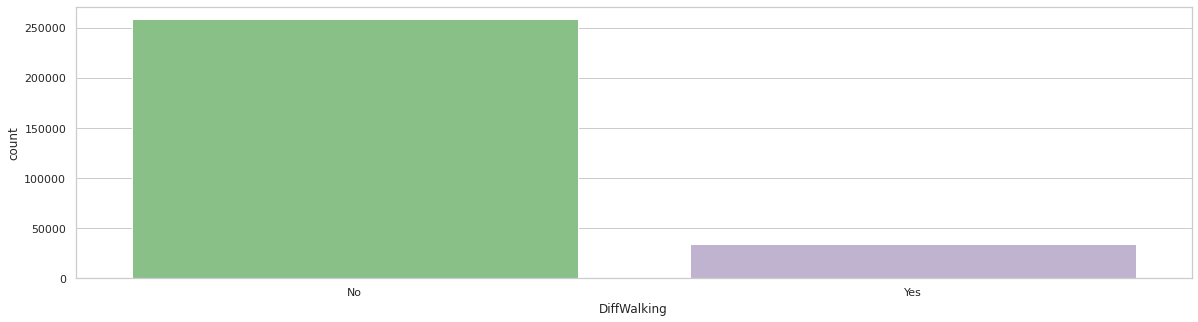

No     258040
Yes     34382
Name: DiffWalking, dtype: int64
No     88.24
Yes    11.76
Name: DiffWalking, dtype: float64


Variable: Sex


<Figure size 432x288 with 0 Axes>

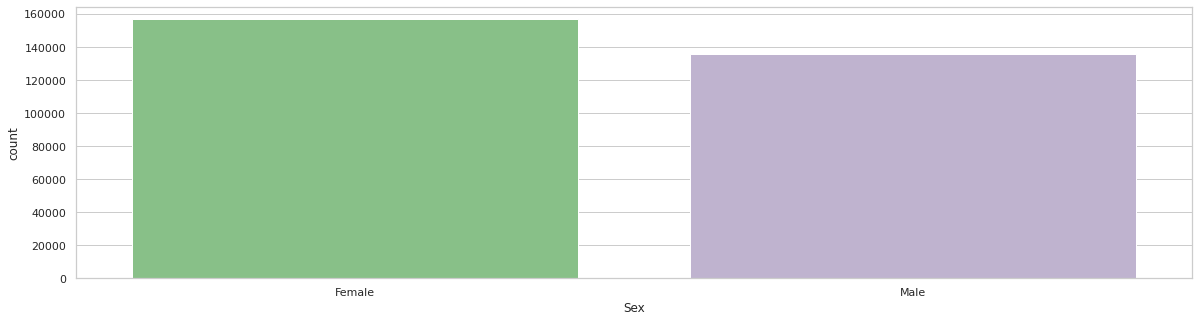

Female    156571
Male      135851
Name: Sex, dtype: int64
Female    53.54
Male      46.46
Name: Sex, dtype: float64


Variable: AgeCategory


<Figure size 432x288 with 0 Axes>

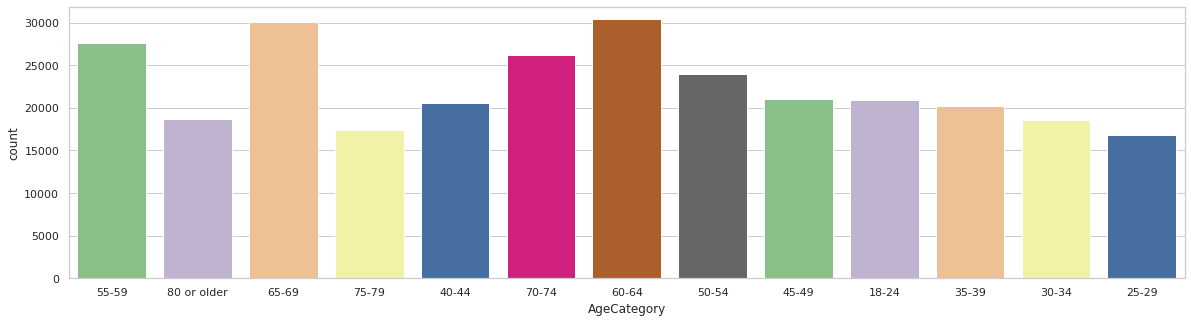

60-64          30359
65-69          30050
55-59          27555
70-74          26218
50-54          23999
45-49          21047
18-24          20934
40-44          20520
35-39          20254
80 or older    18704
30-34          18527
75-79          17433
25-29          16822
Name: AgeCategory, dtype: int64
60-64          10.38
65-69          10.28
55-59           9.42
70-74           8.97
50-54           8.21
45-49           7.20
18-24           7.16
40-44           7.02
35-39           6.93
80 or older     6.40
30-34           6.34
75-79           5.96
25-29           5.75
Name: AgeCategory, dtype: float64


Variable: Race


<Figure size 432x288 with 0 Axes>

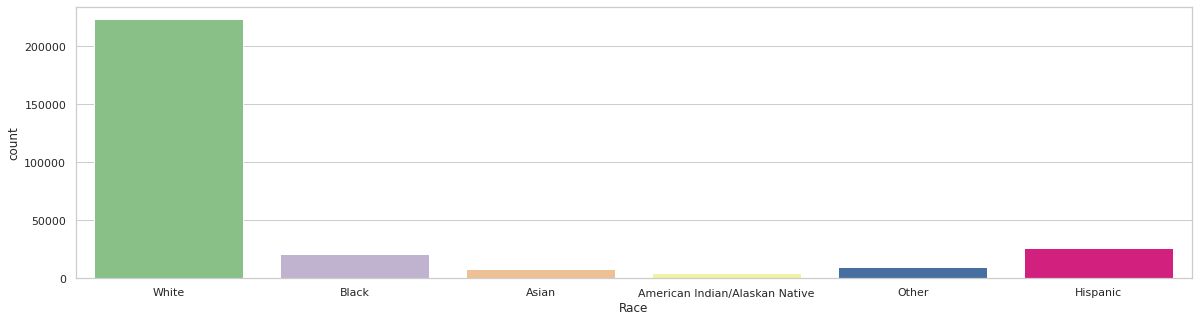

White                             222705
Hispanic                           26003
Black                              21210
Other                              10042
Asian                               7802
American Indian/Alaskan Native      4660
Name: Race, dtype: int64
White                             76.16
Hispanic                           8.89
Black                              7.25
Other                              3.43
Asian                              2.67
American Indian/Alaskan Native     1.59
Name: Race, dtype: float64


Variable: Diabetic


<Figure size 432x288 with 0 Axes>

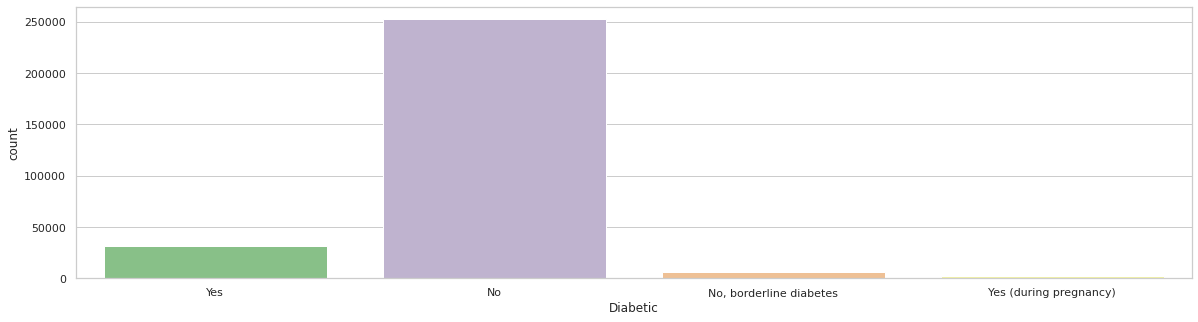

No                         252134
Yes                         31845
No, borderline diabetes      5992
Yes (during pregnancy)       2451
Name: Diabetic, dtype: int64
No                         86.22
Yes                        10.89
No, borderline diabetes     2.05
Yes (during pregnancy)      0.84
Name: Diabetic, dtype: float64


Variable: PhysicalActivity


<Figure size 432x288 with 0 Axes>

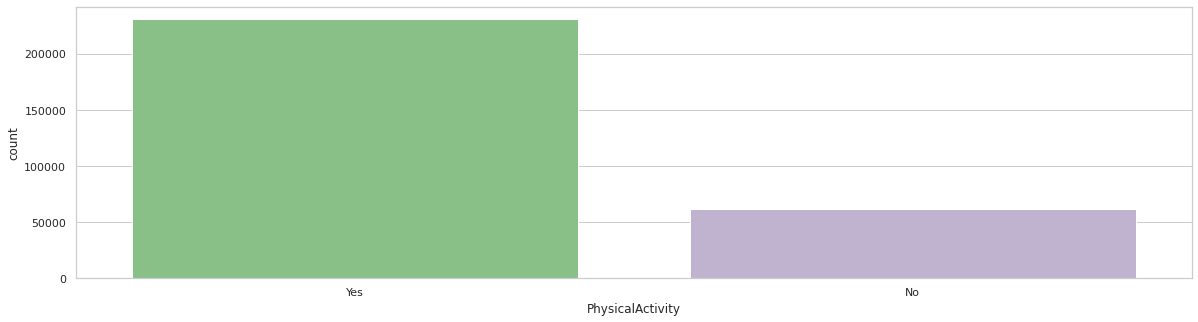

Yes    230468
No      61954
Name: PhysicalActivity, dtype: int64
Yes    78.81
No     21.19
Name: PhysicalActivity, dtype: float64


Variable: GenHealth


<Figure size 432x288 with 0 Axes>

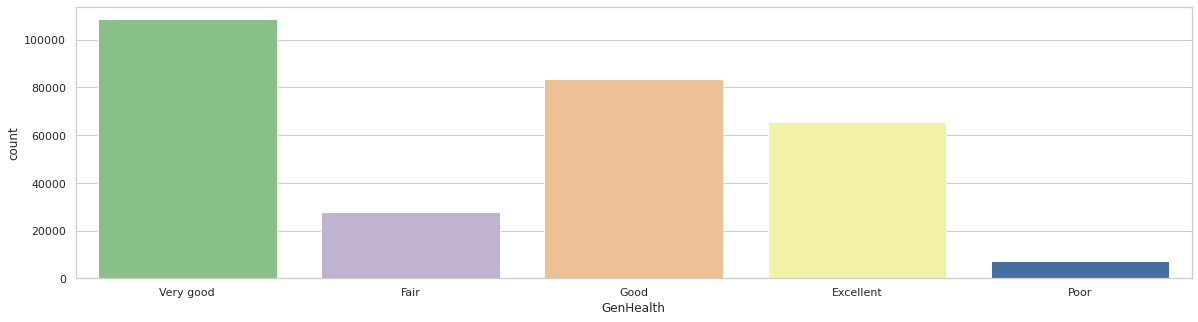

Very good    108477
Good          83571
Excellent     65342
Fair          27593
Poor           7439
Name: GenHealth, dtype: int64
Very good    37.10
Good         28.58
Excellent    22.35
Fair          9.44
Poor          2.54
Name: GenHealth, dtype: float64


Variable: Asthma


<Figure size 432x288 with 0 Axes>

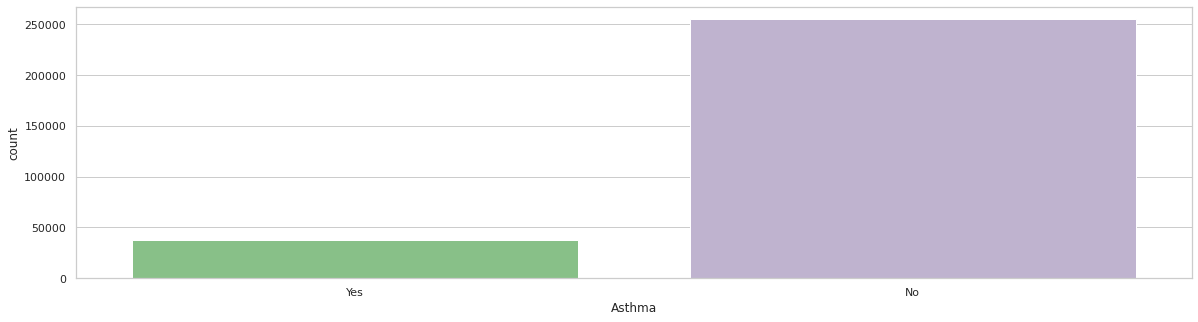

No     254483
Yes     37939
Name: Asthma, dtype: int64
No     87.03
Yes    12.97
Name: Asthma, dtype: float64


Variable: KidneyDisease


<Figure size 432x288 with 0 Axes>

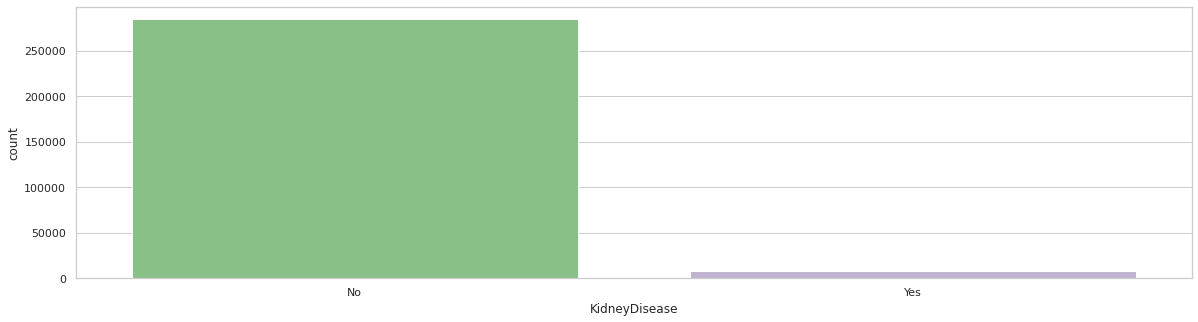

No     284098
Yes      8324
Name: KidneyDisease, dtype: int64
No     97.15
Yes     2.85
Name: KidneyDisease, dtype: float64


Variable: SkinCancer


<Figure size 432x288 with 0 Axes>

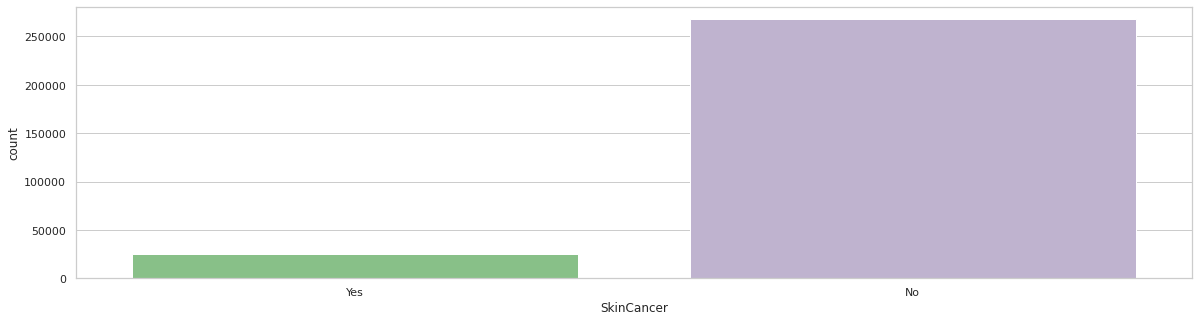

No     267583
Yes     24839
Name: SkinCancer, dtype: int64
No     91.51
Yes     8.49
Name: SkinCancer, dtype: float64




<Figure size 432x288 with 0 Axes>

In [21]:
#Categorical Variables in HDnegative Population
for i in catgnames:
    print('Variable: {}'.format(i))
    barplot(i, hdneg_pd, hd = False)
    print(hdneg_pd[i].value_counts())
    print((hdneg_pd[i].value_counts(normalize = True)*100).round(2))
    print('\n')

From the above visualizations, we can observe:

A larger percentage of the HD negative population are smokers compared to the HD positive population who smoke (60% vs 41%)
A larger percentage of the HD negative population qualify for excessive alcohol consumption (7.06% vs 4.17%)
A much smaller percentage of the HD negative population report having a history of stroke (2.63% vs 16.03%)
A much smaller percentage of the HD negative population report having difficulty walking (11.76% vs 36.63%)
Both genders are fairly well represented, with the distribution only 3% off of a 50/50 split.
Most populous age brackets are 60-64, 65-69, and 55-59.
As expected, like the HD positive group, the most represented race is White since the overwhelming population surveyed was White.
A larger percentage of the HD negative population report to not have a history of diabetes compared to the HD positive population with a history of diabetes (86.22% vs. 64%)
A greater percentage of the HD negative population report physical activity outside their job within the last 30 days (78.11% vs. 63.89%)
Most of the HD negative population would describe their general health to be "Very Good"
There is not a significant difference in percentage of individuals positive for asthma in the HD negative population compared to the HD positive population (87.03% vs 81.98%)
The HD negative population have decreased percentages of kidney disease and skin cancer (2.8% and 8.5%, respectively) compared to the HD positive population (12.6% and 18.2%, respectively).

#### HD Negative Continuous Variables - Descriptive Statistics and Visualizations

In [22]:
hdneg.select(['BMI','PhysicalHealth','MentalHealth','SleepTime']).summary().show()

+-------+------------------+------------------+------------------+------------------+
|summary|               BMI|    PhysicalHealth|      MentalHealth|         SleepTime|
+-------+------------------+------------------+------------------+------------------+
|  count|            292422|            292422|            292422|            292422|
|   mean|28.224658336237816| 2.956415727954805|3.8287782724965975| 7.093416364021858|
| stddev| 6.325660128120096|7.4003779068006015| 7.828079007279277|1.3993305324035759|
|    min|             12.02|               0.0|               0.0|               1.0|
|    25%|             23.89|               0.0|               0.0|               6.0|
|    50%|             27.26|               0.0|               0.0|               7.0|
|    75%|             31.32|               1.0|               3.0|               8.0|
|    max|             94.85|              30.0|              30.0|              24.0|
+-------+------------------+------------------+-------

### Correlation Matrix

In [23]:
# Ordinal Encoder

hd = pd.read_csv("heart_2020_cleaned.csv")

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
hd = ordinal_encoder.fit_transform(hd[catgnames])
hd = pd.DataFrame(hd, columns = catgnames)
hd.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0


In [24]:
print(hd.info())
print()
for col in hd:
    print(col, ", Levels = ", hd[col].nunique())
    print(hd[col].unique(),)
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  float64
 1   Smoking           319795 non-null  float64
 2   AlcoholDrinking   319795 non-null  float64
 3   Stroke            319795 non-null  float64
 4   DiffWalking       319795 non-null  float64
 5   Sex               319795 non-null  float64
 6   AgeCategory       319795 non-null  float64
 7   Race              319795 non-null  float64
 8   Diabetic          319795 non-null  float64
 9   PhysicalActivity  319795 non-null  float64
 10  GenHealth         319795 non-null  float64
 11  Asthma            319795 non-null  float64
 12  KidneyDisease     319795 non-null  float64
 13  SkinCancer        319795 non-null  float64
dtypes: float64(14)
memory usage: 34.2 MB
None

HeartDisease , Levels =  2
[0. 1.]


Smoking , Levels =  2
[1. 0.]


Alco

In [25]:
hdmerged = pd.merge(hd, cont_pd, left_index = True, right_index = True)
hdmerged.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,16.60,3.0,30.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
2,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,26.58,20.0,30.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,23.71,28.0,0.0,8.0


In [26]:
# Correlation Matrix

hdcorr = hdmerged.corr()
print(hdcorr[hdcorr.columns[0]])

HeartDisease        1.000000
Smoking             0.107764
AlcoholDrinking    -0.032080
Stroke              0.196835
DiffWalking         0.201258
Sex                 0.070040
AgeCategory         0.233432
Race                0.034854
Diabetic            0.168553
PhysicalActivity   -0.100030
GenHealth          -0.011062
Asthma              0.041444
KidneyDisease       0.145197
SkinCancer          0.093317
BMI                 0.051803
PhysicalHealth      0.170721
MentalHealth        0.028591
SleepTime           0.008327
Name: HeartDisease, dtype: float64


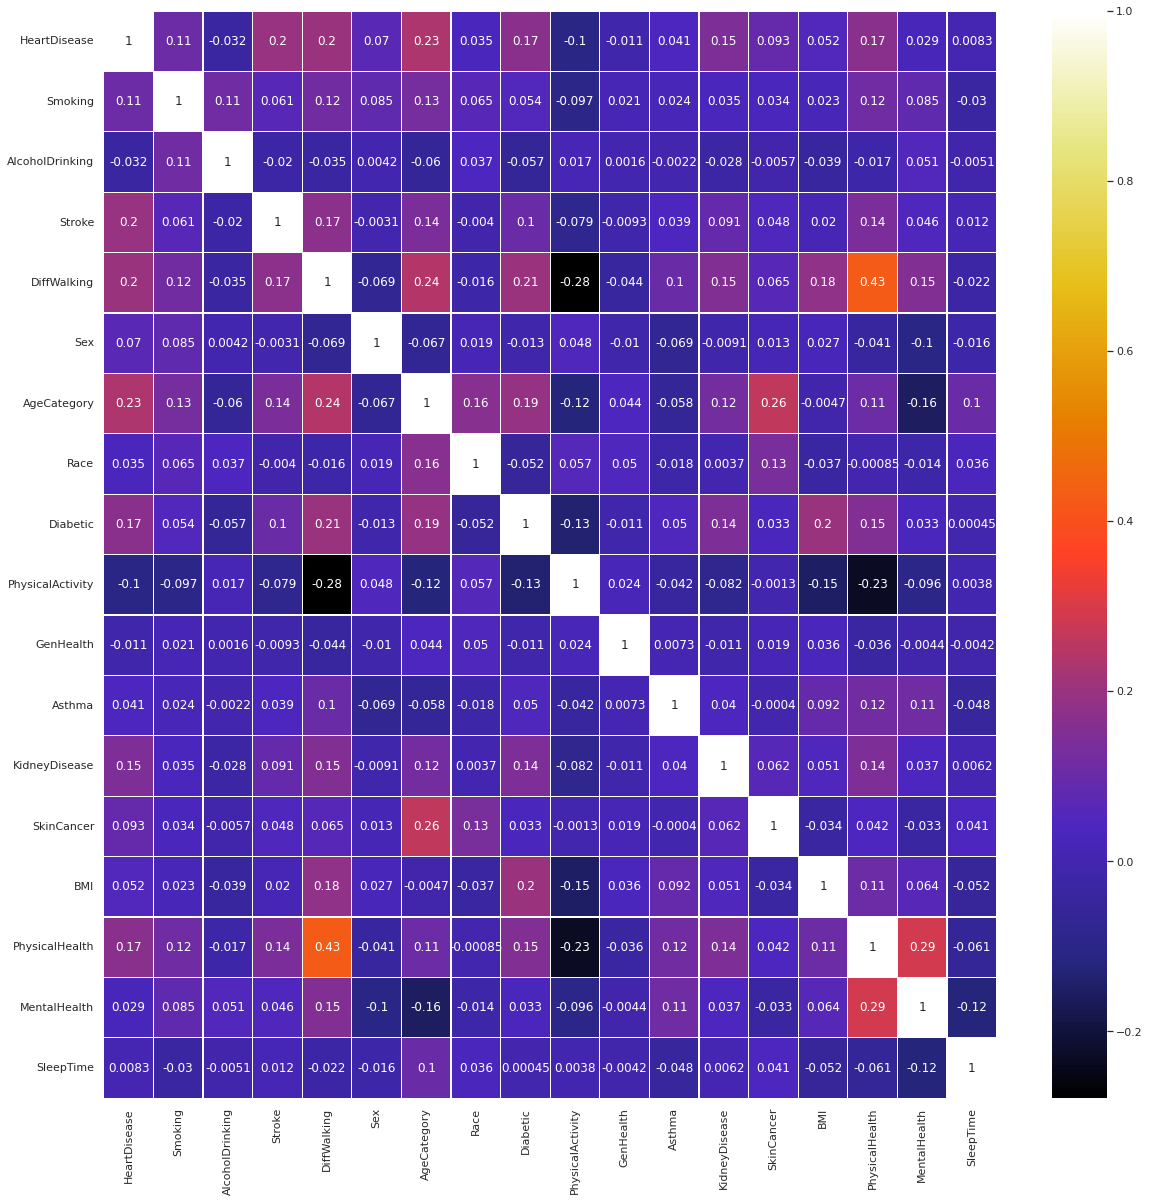

In [27]:
plt.figure(figsize = (20,20))
sns.heatmap(hdcorr,linewidth=0.1, annot = True, cmap='CMRmap')
plt.yticks(rotation=0)
plt.show()

# Machine Learning Model

In [28]:
heart2 = heart.dropna()
heart2.count()

319795

In [29]:
heart2.dtypes

[('HeartDisease', 'string'),
 ('BMI', 'double'),
 ('Smoking', 'string'),
 ('AlcoholDrinking', 'string'),
 ('Stroke', 'string'),
 ('PhysicalHealth', 'double'),
 ('MentalHealth', 'double'),
 ('DiffWalking', 'string'),
 ('Sex', 'string'),
 ('AgeCategory', 'string'),
 ('Race', 'string'),
 ('Diabetic', 'string'),
 ('PhysicalActivity', 'string'),
 ('GenHealth', 'string'),
 ('SleepTime', 'double'),
 ('Asthma', 'string'),
 ('KidneyDisease', 'string'),
 ('SkinCancer', 'string')]

In [30]:
heart2.groupBy('Race').count().orderBy('Race').show()

+--------------------+------+
|                Race| count|
+--------------------+------+
|American Indian/A...|  5202|
|               Asian|  8068|
|               Black| 22939|
|            Hispanic| 27446|
|               Other| 10928|
|               White|245212|
+--------------------+------+



In [31]:
white_df = heart2.filter(heart2['Race'] == 'White')
other_df = heart2.filter(heart2['Race'] == 'Other')
hispanic_df = heart2.filter(heart2['Race'] == 'Hispanic')
black_df = heart2.filter(heart2['Race'] == 'Black')
asian_df = heart2.filter(heart2['Race'] == 'Asian')
indian_df = heart2.filter(heart2['Race'] == 'American Indian/Alaskan Native')

In [32]:
n = black_df.count()
a = range(n)

In [33]:
from pyspark.sql.functions import col, explode, array, lit

over_indian = indian_df.withColumn("dummy", explode(array([lit(x) for x in range(int(22939/5202))]))).drop('dummy')
over_asian = asian_df.withColumn("dummy", explode(array([lit(x) for x in range(int(22939/8068))]))).drop('dummy')
over_other = other_df.withColumn("dummy", explode(array([lit(x) for x in range(int(22939/10928))]))).drop('dummy')

In [34]:
under_hispanic = hispanic_df.sample(False, 22939/27446)
under_white = white_df.sample(False, 22939/245212)

In [35]:
heart3 = black_df.unionAll(over_indian)
heart3 = heart3.unionAll(over_asian)
heart3 = heart3.unionAll(over_other)
heart3 = heart3.unionAll(under_hispanic)
heart3 = heart3.unionAll(under_white)

heart3.count()

127308

In [62]:
heart3.groupBy('Race').count().orderBy('Race').show()

+--------------------+-----+
|                Race|count|
+--------------------+-----+
|American Indian/A...|20808|
|               Asian|16136|
|               Black|22939|
|            Hispanic|22807|
|               Other|21856|
|               White|22762|
+--------------------+-----+



In [37]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

cols = ['HeartDisease', 'AlcoholDrinking','Stroke',
             'DiffWalking','Sex','AgeCategory','Race','Diabetic',
             'PhysicalActivity','GenHealth','Asthma','KidneyDisease',
             'SkinCancer']
stages = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(heart3) for column in cols]
stages.append(OneHotEncoder(inputCols=["HeartDisease_index",  "AlcoholDrinking_index", "Stroke_index", 'DiffWalking_index','Sex_index','AgeCategory_index','Race_index','Diabetic_index','PhysicalActivity_index','GenHealth_index','Asthma_index','KidneyDisease_index','SkinCancer_index'], 
                            outputCols=["HeartDisease_num", 'AlcoholDrinking_num','Stroke_num','DiffWalking_num','Sex_num','AgeCategory_num','Race_num','Diabetic_num','PhysicalActivity_num','GenHealth_num','Asthma_num','KidneyDisease_num','SkinCancer_num']))
\
feature_cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
stages.append(VectorAssembler(inputCols=feature_cols, outputCol='features'))

pipeline = Pipeline(stages=stages)
heart_transformed = pipeline.fit(heart3).transform(heart3)

heart_transformed.show(20)

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+------------------+---------------------+------------+-----------------+---------+-----------------+----------+--------------+----------------------+---------------+------------+-------------------+----------------+----------------+-------------------+-------------+---------------+-------------+---------------+-------------+-------------+--------------------+-------------+-------------+-----------------+--------------+--------------------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|HeartDisease_index|AlcoholDrinking_index|Stroke_index|DiffWalking_index|Sex_index|AgeCategory_index|Race_index|Diabetic_index|PhysicalActivity_i

In [65]:
heart_transformed.groupBy('HeartDisease_index').count().orderBy('HeartDisease_index').show()

+------------------+------+
|HeartDisease_index| count|
+------------------+------+
|               0.0|117798|
|               1.0|  9510|
+------------------+------+



In [112]:
seed = 10
heart_split = heart_transformed.randomSplit([0.8,0.2], seed)

In [113]:
heart_train = heart_split[0]
heart_train.count()

101663

In [114]:
heart_test = heart_split[1]
heart_test.count()

25645

In [115]:
heart_train.groupBy('HeartDisease_index').count().orderBy('HeartDisease_index').show()

+------------------+-----+
|HeartDisease_index|count|
+------------------+-----+
|               0.0|94041|
|               1.0| 7622|
+------------------+-----+



In [116]:
heart_test.groupBy('HeartDisease_index').count().orderBy('HeartDisease_index').show()

+------------------+-----+
|HeartDisease_index|count|
+------------------+-----+
|               0.0|23757|
|               1.0| 1888|
+------------------+-----+



In [117]:
heart_train.show(20)

+------------+-----+-------+---------------+------+--------------+------------+-----------+------+-----------+-----+--------------------+----------------+---------+---------+------+-------------+----------+------------------+---------------------+------------+-----------------+---------+-----------------+----------+--------------+----------------------+---------------+------------+-------------------+----------------+----------------+-------------------+-------------+---------------+-------------+---------------+-------------+-------------+--------------------+-------------+-------------+-----------------+--------------+--------------------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|            Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|HeartDisease_index|AlcoholDrinking_index|Stroke_index|DiffWalking_index|Sex_index|AgeCategory_index|Race_index|Diabetic_index|PhysicalActivity_i

In [118]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'HeartDisease_index', maxDepth = 2, maxBins = 32, numTrees = 20)
rf_model = rf.fit(heart_train)
predictions = rf_model.transform(heart_test)
predictions.select('HeartDisease', 'BMI',  'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 
                   'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 
                   'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_index', 'rawPrediction', 'probability', 'prediction').show(20)

+------------+-----+---------------+------+--------------+------------+-----------+------+-----------+-----+--------+----------------+---------+---------+------+-------------+----------+------------------+--------------------+--------------------+----------+
|HeartDisease|  BMI|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|   Sex|AgeCategory| Race|Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|HeartDisease_index|       rawPrediction|         probability|prediction|
+------------+-----+---------------+------+--------------+------------+-----------+------+-----------+-----+--------+----------------+---------+---------+------+-------------+----------+------------------+--------------------+--------------------+----------+
|          No|12.48|             No|    No|           0.0|        30.0|         No|Female|80 or older|Black|      No|             Yes|     Good|      8.0|    No|           No|        No|               0.0|[18.4992831236249.

In [126]:
predictions.select('HeartDisease_index', 'prediction').show(20)

+------------------+----------+
|HeartDisease_index|prediction|
+------------------+----------+
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
|               0.0|       0.0|
+------------------+----------+
only showing top 20 rows



In [120]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = predictions.select(['prediction','HeartDisease_index']).withColumn('HeartDisease_index', F.col('HeartDisease_index').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','HeartDisease_index'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

[[23757.     0.]
 [ 1888.     0.]]


In [121]:
y_true = predictions.select(['HeartDisease_index']).collect()
y_pred = predictions.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     23757
         1.0       0.00      0.00      0.00      1888

    accuracy                           0.93     25645
   macro avg       0.46      0.50      0.48     25645
weighted avg       0.86      0.93      0.89     25645



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
y_true = predictions.select(['HeartDisease_index']).collect()
y_pred = predictions.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[23757     0]
 [ 1888     0]]


In [123]:
accuracy = round(metrics.accuracy,4)
precision = round(metrics.precision(1.0),4)
recall = round(metrics.recall(1.0),4)
f1Score = round(metrics.fMeasure(1.0),4)
print("Summary Stats")
print("Accuracy = %s" % accuracy)
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Accuracy = 0.9264
Precision = 0.0
Recall = 0.0
F1 Score = 0.0


In [124]:
accuracy = round(metrics.accuracy,4)
precision = round(metrics.precision(0.0),4)
recall = round(metrics.recall(0.0),4)
f1Score = round(metrics.fMeasure(0.0),4)
print("Summary Stats")
print("Accuracy = %s" % accuracy)
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Accuracy = 0.9264
Precision = 0.9264
Recall = 1.0
F1 Score = 0.9618


In [125]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Instantiate metrics object
metrics = BinaryClassificationMetrics(preds_and_labels.rdd.map(tuple))

# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


Area under PR = 0.07362058880873465
Area under ROC = 0.5
